In [1]:
import pandas as pd
import numpy as np
import psycopg2 as pg 

In [31]:
participant = pd.read_csv(r'D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\participants.tsv' , sep='\t')

participant

participant_id Gender  Age SessionOrder EEG_SamplingTime_Open_NS  \
0          sub-01      M   22       NS->SD                  8:57:52   
1          sub-02      M   21       NS->SD                  9:47:46   
2          sub-03      F   19       NS->SD                  8:49:46   
3          sub-04      M   22       NS->SD                  9:53:56   
4          sub-05      F   18       NS->SD                 20:37:12   
..            ...    ...  ...          ...                      ...   
66         sub-67      F   21       SD->NS                 14:55:42   
67         sub-68      F   21       SD->NS                 17:04:59   
68         sub-69      F   18       NS->SD                 17:12:49   
69         sub-70      M   19       NS->SD                 10:38:22   
70         sub-71      M   21       NS->SD                 10:24:48   

   EEG_SamplingTime_Closed_NS EEG_SamplingTime_Open_SD  \
0                     9:04:40                  8:18:28   
1                     9:53:24                  8:54:10   
2                     8:55:38                  9:58:36   
3                     9:59:34                  9:07:02   
4                    20:47:34                  9:09:00   
..                        ...                      ...   
66                        NaN                 13:23:23   
67                        NaN                 15:02:13   
68                        NaN                 14:18:55   
69                        NaN                  9:47:22   
70                        NaN                  9:26:30   

   EEG_SamplingTime_Closed_SD PVT_SamplingTime_NS PVT_SamplingTime_SD  ...  \
0                     8:25:34             9:27:23             9:23:08  ...   
1                     8:59:50            10:16:59            10:00:47  ...   
2                    10:04:08             8:45:04             9:34:13  ...   
3                     9:12:26            10:05:35            10:06:28  ...   
4                     9:14:34            21:01:57            10:07:33  ...   
..                        ...                 ...                 ...  ...   
66                        NaN                 NaN                 NaN  ...   
67                        NaN                 NaN                 NaN  ...   
68                        NaN                 NaN                 NaN  ...   
69                        NaN                 NaN                 NaN  ...   
70                        NaN                 NaN                 NaN  ...   

      EQ  Buss_Perry  PSQI_GlobalScore  PSQI_item1  PSQI_item2  PSQI_item3  \
0    NaN         NaN               4.0         1.0         2.0         0.0   
1    NaN         NaN               NaN         NaN         NaN         NaN   
2    NaN         NaN               7.0         2.0         1.0         0.0   
3    NaN         NaN               NaN         NaN         NaN         NaN   
4    NaN         NaN               3.0         1.0         1.0         0.0   
..   ...         ...               ...         ...         ...         ...   
66  21.0        60.0               6.0         1.0         1.0         0.0   
67  36.0        64.0               5.0         2.0         1.0         0.0   
68  33.0        46.0               6.0         0.0         3.0         1.0   
69   NaN         NaN               NaN         NaN         NaN         NaN   
70   NaN         NaN               NaN         NaN         NaN         NaN   

    PSQI_item4  PSQI_item5  PSQI_item6  PSQI_item7  
0          0.0         1.0         0.0         0.0  
1          NaN         NaN         NaN         NaN  
2          1.0         2.0         0.0         1.0  
3          NaN         NaN         NaN         NaN  
4          0.0         1.0         0.0         0.0  
..         ...         ...         ...         ...  
66         0.0         1.0         0.0         3.0  
67         0.0         0.0         0.0         2.0  
68         0.0         0.0         0.0         2.0  
69         NaN         NaN         NaN         Na

In [32]:
participant_id = participant['participant_id']

session_order = participant['SessionOrder']

for i in range(len(session_order)):
    print(session_order[i].split('->'))

# for i in range(len(participant_id)):
#     print(participant_id[i])

['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['NS', 'SD']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['SD', 'NS']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['SD', 'NS']
['NS', 'SD']
['SD', 'NS']
['NS', 'SD']
['SD', 'NS']
['SD', 'NS']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['SD', 'NS']
['SD', 'NS']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['SD', 'NS']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']
['SD', 'NS']
['NS', 'SD']
['SD', 'NS']
['SD', 'NS']
['NS', 'SD']
['NS', 'SD']
['NS', 'SD']


In [2]:
conn = pg.connect(
    host="localhost",
    database="eeg",
    user="admin",
    password="admin123",
    port=5432
)

cur = conn.cursor()

# Define Function 

In [34]:

import mne
import time

def insert_eeg_data(participant_id, session_order):
    seslist = ['ses-1', 'ses-2']
    eye_stateList = ['eyesclosed', 'eyesopen']

    for i_ses in range(len(seslist)):
        ses = seslist[i_ses]
        for i_eye in range(len(eye_stateList)):
            eye_state = eye_stateList[i_eye]
            
            # Skip eyeclosed state if participant_id is greater than sub-39
            if int(participant_id.split('-')[1]) >= 39 and eye_state == 'eyesclosed':
                continue
            
            filePath = rf'D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\{participant_id}\{ses}\eeg\{participant_id}_{ses}_task-{eye_state}_eeg.set'
            try:
                raw = mne.io.read_raw_eeglab(filePath)
                eegData = raw.get_data()
                ch_names = raw.ch_names

                sleep_state = 'good sleep' if session_order[i_ses] == 'NS' else 'bad sleep'
                for ch in range(len(ch_names)):
                    #Preprocessing:

                    # Apply band-pass filtering (e.g., 0.5–50 Hz).
                    # Remove artifacts (e.g., eye blinks, muscle movements).
                    # Normalize or scale the data for consistency.

                    name = ch_names[ch].lower()
                    data = np.mean(eegData[ch]) * 1000



                    
                    sqlinsert = f"INSERT INTO eeg_data (participant_id,status_eye,sleep_status,{name}) VALUES ('{participant_id}', '{eye_state}','{sleep_state}' , {data})"
                    sqlUpdate = f"UPDATE eeg_data SET {name} = {data} WHERE participant_id = '{participant_id}' AND status_eye = '{eye_state}' AND sleep_status = '{sleep_state}'"
                    
                    if ch == 0:
                        cur.execute(sqlinsert)
                        conn.commit()
                    else:
                        cur.execute(sqlUpdate)
                        conn.commit()

                time.sleep(1)
            except RuntimeError as e:
                print(f"Error loading {filePath}: {e}")

In [35]:
for i in range(len(participant_id)):
    insert_eeg_data(participant_id[i], session_order[i].split('->'))

Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-01\ses-1\eeg\sub-01_ses-1_task-eyesclosed_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-01\ses-1\eeg\sub-01_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-01\ses-2\eeg\sub-01_ses-2_task-eyesclosed_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-01\ses-2\eeg\sub-01_ses-2_task-eyesopen_eeg.fdt
Error loading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-01\ses-2\eeg\sub-01_ses-2_task-eyesopen_eeg.set: Incorrect number of samples (6951331 != 9150000), please report this error to MNE-Python developers
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-02\ses-1\eeg\sub-02_ses-1_task-eyesclosed_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-02\ses-1\eeg\sub-02_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-02\ses-2\eeg\sub-02_ses-2_task-eyesclosed_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds00490

C:\Users\koonf\AppData\Local\Temp\ipykernel_16964\1478656873.py:19: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-47\ses-1\eeg\sub-47_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-47\ses-2\eeg\sub-47_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-48\ses-1\eeg\sub-48_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-48\ses-2\eeg\sub-48_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-49\ses-1\eeg\sub-49_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-49\ses-2\eeg\sub-49_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-50\ses-1\eeg\sub-50_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-50\ses-2\eeg\sub-50_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-51\ses-1\eeg\sub-51_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\su

C:\Users\koonf\AppData\Local\Temp\ipykernel_16964\1478656873.py:19: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-52\ses-1\eeg\sub-52_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-52\ses-2\eeg\sub-52_ses-2_task-eyesopen_eeg.fdt


C:\Users\koonf\AppData\Local\Temp\ipykernel_16964\1478656873.py:19: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-53\ses-1\eeg\sub-53_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-53\ses-2\eeg\sub-53_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-54\ses-1\eeg\sub-54_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-54\ses-2\eeg\sub-54_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-55\ses-1\eeg\sub-55_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-55\ses-2\eeg\sub-55_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-56\ses-1\eeg\sub-56_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-56\ses-2\eeg\sub-56_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-57\ses-1\eeg\sub-57_ses-1_task-eyesopen_eeg.fdt


C:\Users\koonf\AppData\Local\Temp\ipykernel_16964\1478656873.py:19: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(filePath)
C:\Users\koonf\AppData\Local\Temp\ipykernel_16964\1478656873.py:19: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-57\ses-2\eeg\sub-57_ses-2_task-eyesopen_eeg.fdt


C:\Users\koonf\AppData\Local\Temp\ipykernel_16964\1478656873.py:19: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-58\ses-1\eeg\sub-58_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-58\ses-2\eeg\sub-58_ses-2_task-eyesopen_eeg.fdt


C:\Users\koonf\AppData\Local\Temp\ipykernel_16964\1478656873.py:19: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-59\ses-1\eeg\sub-59_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-59\ses-2\eeg\sub-59_ses-2_task-eyesopen_eeg.fdt


C:\Users\koonf\AppData\Local\Temp\ipykernel_16964\1478656873.py:19: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-60\ses-1\eeg\sub-60_ses-1_task-eyesopen_eeg.fdt


C:\Users\koonf\AppData\Local\Temp\ipykernel_16964\1478656873.py:19: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-60\ses-2\eeg\sub-60_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-61\ses-1\eeg\sub-61_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-61\ses-2\eeg\sub-61_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-62\ses-1\eeg\sub-62_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-62\ses-2\eeg\sub-62_ses-2_task-eyesopen_eeg.fdt


C:\Users\koonf\AppData\Local\Temp\ipykernel_16964\1478656873.py:19: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-63\ses-1\eeg\sub-63_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-63\ses-2\eeg\sub-63_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-64\ses-1\eeg\sub-64_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-64\ses-2\eeg\sub-64_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-65\ses-1\eeg\sub-65_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-65\ses-2\eeg\sub-65_ses-2_task-eyesopen_eeg.fdt


C:\Users\koonf\AppData\Local\Temp\ipykernel_16964\1478656873.py:19: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-66\ses-1\eeg\sub-66_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-66\ses-2\eeg\sub-66_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-67\ses-1\eeg\sub-67_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-67\ses-2\eeg\sub-67_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-68\ses-1\eeg\sub-68_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-68\ses-2\eeg\sub-68_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-69\ses-1\eeg\sub-69_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-69\ses-2\eeg\sub-69_ses-2_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\sub-70\ses-1\eeg\sub-70_ses-1_task-eyesopen_eeg.fdt
Reading D:\Work\DSDE\Notebook\dataset\ds004902-1.0.5\su

In [31]:
eeg_data_raw = pd.read_sql_query("SELECT * FROM eeg_data", conn)

# mergedf = pd.merge(participant, eeg_data, on='participant_id')


# mergedf.to_csv(r'D:\Work\DSDE\Notebook\merged_data.csv', index=False)

C:\Users\koonf\AppData\Local\Temp\ipykernel_34992\3531327324.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  eeg_data_raw = pd.read_sql_query("SELECT * FROM eeg_data", conn)


# Load Data 

In [38]:
eeg_data_raw = eeg_data_raw.drop(columns=['participant_id'])


import pandas as pd
from sklearn.preprocessing import StandardScaler

# ดึงข้อมูลจาก database
eeg_data_raw = pd.read_sql_query("SELECT * FROM eeg_data", conn)

# ลบคอลัมน์ที่ไม่เกี่ยวข้อง เช่น participant_id
eeg_data_raw = eeg_data_raw.drop(columns=['participant_id'])

# เลือกเฉพาะคอลัมน์ที่เป็น numerical EEG channels
eeg_channels = eeg_data_raw.select_dtypes(include=['float', 'int'])

# Standardize ข้อมูล EEG channels
scaler = StandardScaler()
eeg_scaled = scaler.fit_transform(eeg_channels)

# เปลี่ยนกลับเป็น DataFrame พร้อมคอลัมน์เดิม
eeg_scaled_df = pd.DataFrame(eeg_scaled, columns=eeg_channels.columns)

# หากต้องการรวม categorical columns กลับไป
eeg_data = pd.concat([eeg_data_raw[['status_eye', 'sleep_status']], eeg_scaled_df], axis=1)

# ดูผลลัพธ์


KeyError: "['participant_id'] not found in axis"

In [58]:

eeg_data.head()

status_eye sleep_status       fp1       af3       af7        fz        f1  \
0    eyesopen    bad sleep  0.201216  1.344961 -1.059165 -0.800976 -0.174703   
1    eyesopen    bad sleep -1.637160  0.323588 -0.509057 -0.934863 -0.474913   
2    eyesopen   good sleep  1.394980 -0.807392  0.615472 -0.688870 -0.809735   
3  eyesclosed    bad sleep -1.627623 -0.693899  0.347570 -0.449698 -0.171707   
4    eyesopen    bad sleep -0.543699 -0.880259 -0.896952 -1.388867 -1.292324   

         f3        f5        f7  ...      tp10        p2        p4        p6  \
0 -1.939043 -0.586684 -2.265810  ... -0.492581 -1.386908 -0.740648 -3.153881   
1 -0.939792  0.208850 -0.673830  ... -0.679981 -1.265285 -0.616208 -0.982931   
2 -1.067425 -0.221455 -1.148974  ... -1.388524 -1.162478 -0.640420 -2.669442   
3  0.015417 -0.488268 -0.504178  ... -1.372294 -0.874665 -0.062170 -0.364124   
4 -0.960720 -0.447147 -1.050537  ... -1.219347 -1.757763 -0.382795 -1.385476   

         p8       poz       po4       po8        o2        combined_class  
0 -0.839881 -1.211223 -3.520136 -0.654149 -2.167440    bad sleep eyesopen  
1  2.188526 -1.947174 -0.422683  0.294004 -1.544661    bad sleep eyesopen  
2 -1.522507 -1.115110 -0.793488 -0.490747 -1.233741   good sleep eyesopen  
3 -0.097766  0.152326  0.329710  0.620799 -0.977269  bad sleep eyesclosed  
4 -0.757141 -1.768212 -0.972059 -0.382003 -1.445227    bad sleep eyesopen  

[5 rows x 64 columns]

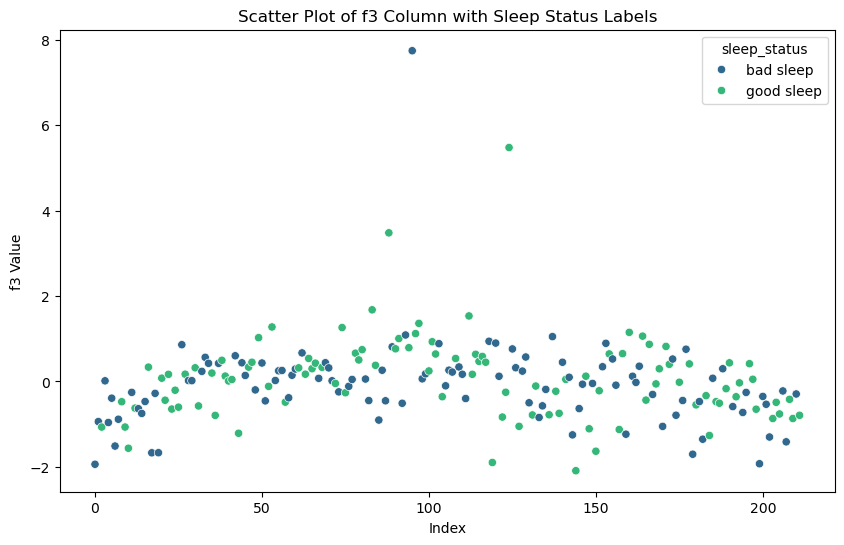

In [39]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a scatter plot for the 'f3' column with labels for 2 classes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=eeg_data, x=eeg_data.index, y='f3', hue='sleep_status', palette='viridis')

# Set the title and labels
plt.title('Scatter Plot of f3 Column with Sleep Status Labels')
plt.xlabel('Index')
plt.ylabel('f3 Value')

# Display the plot
plt.show()

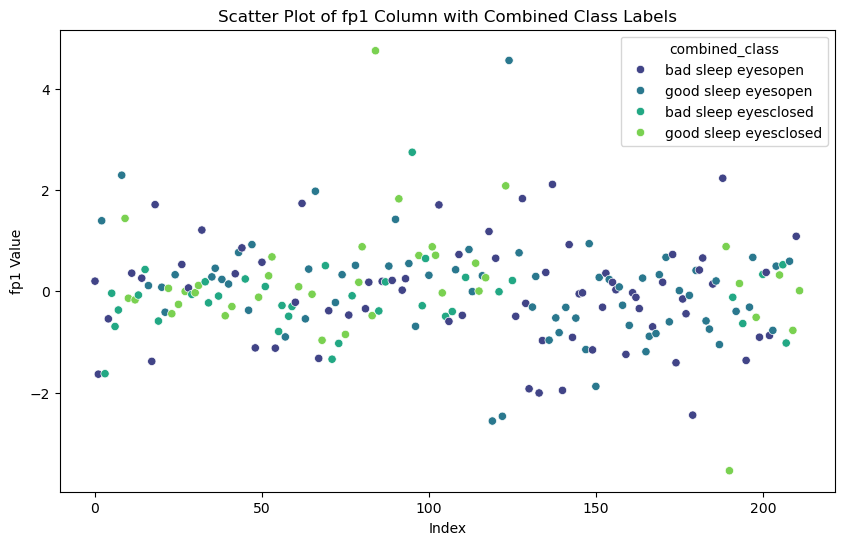

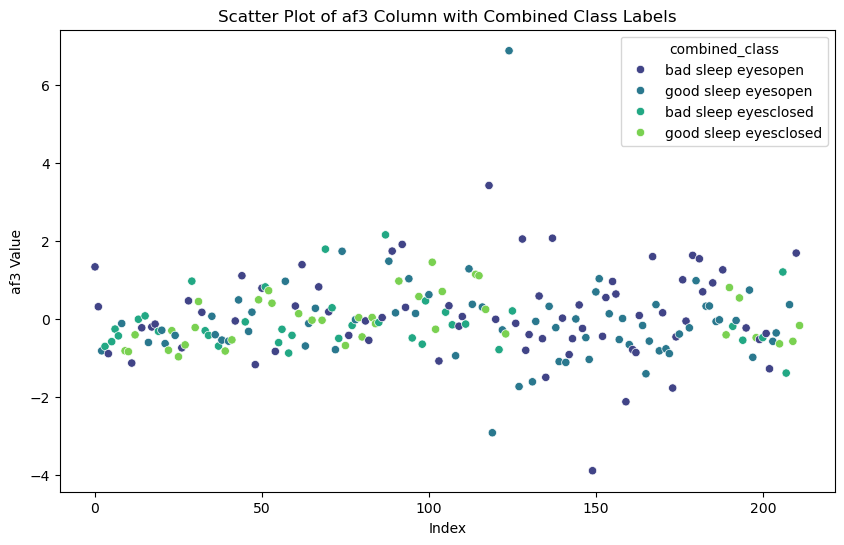

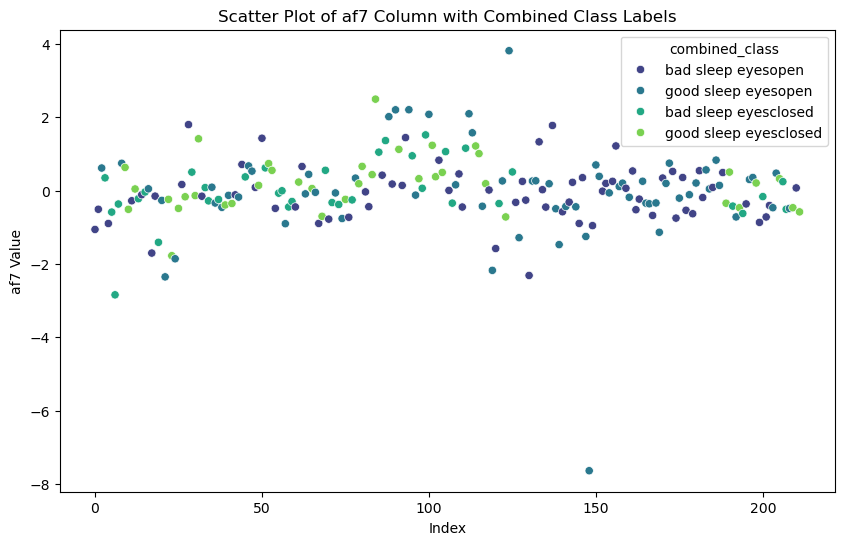

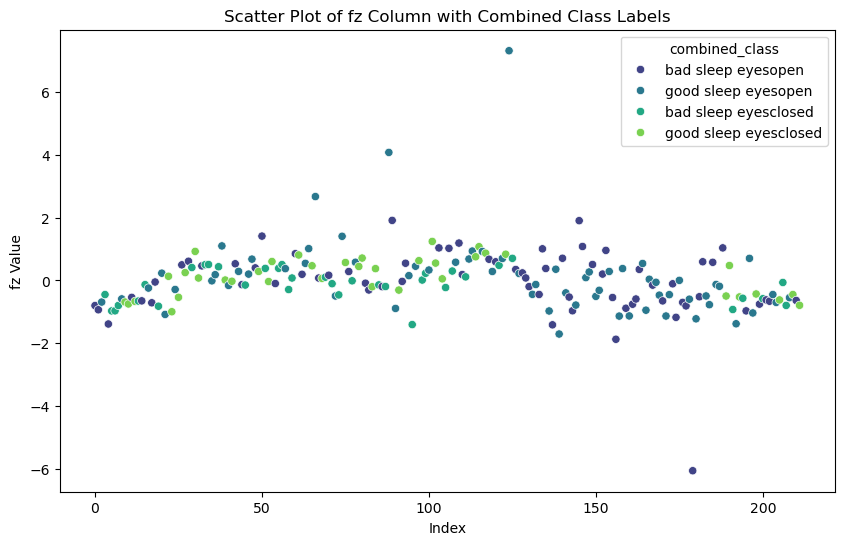

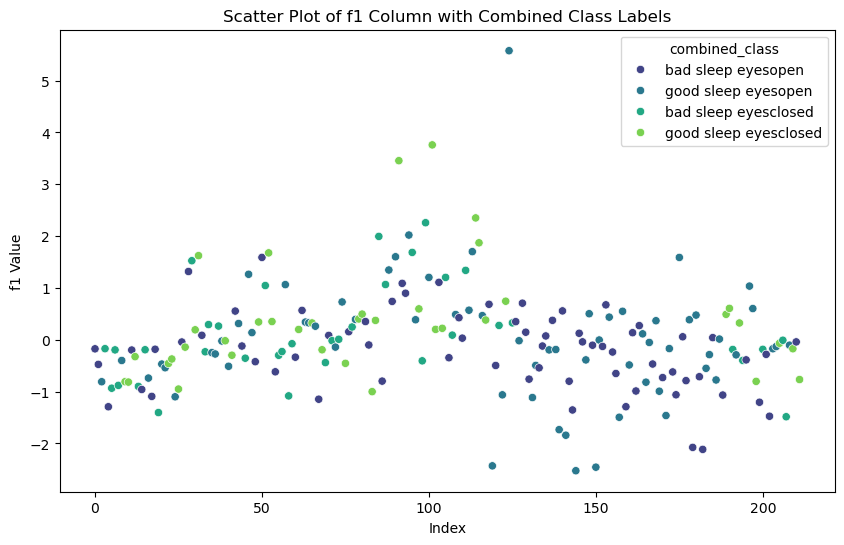

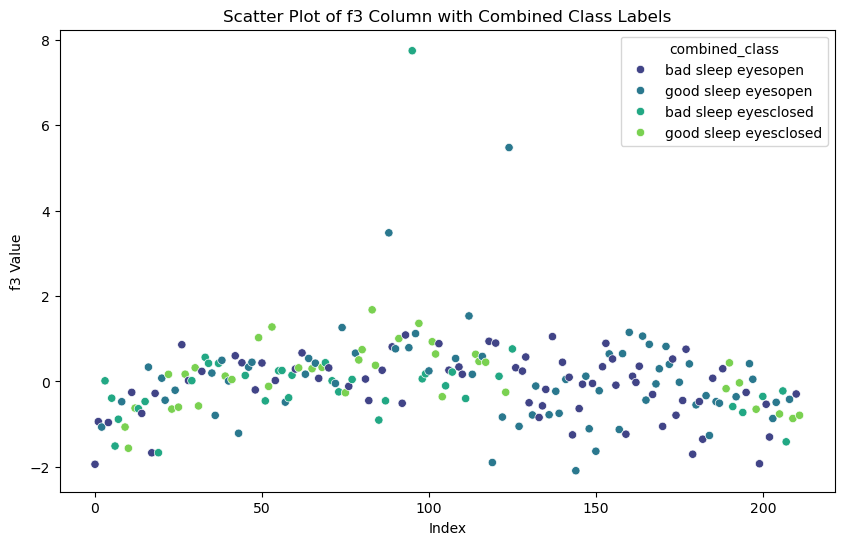

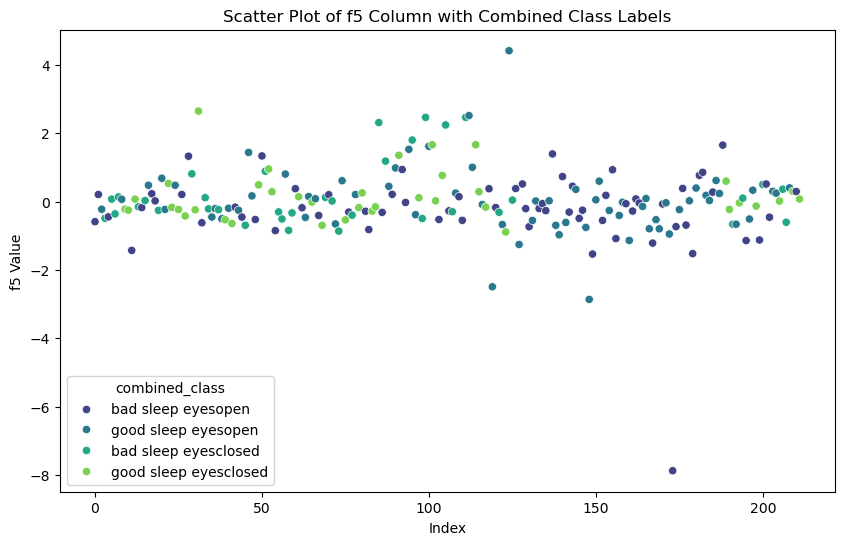

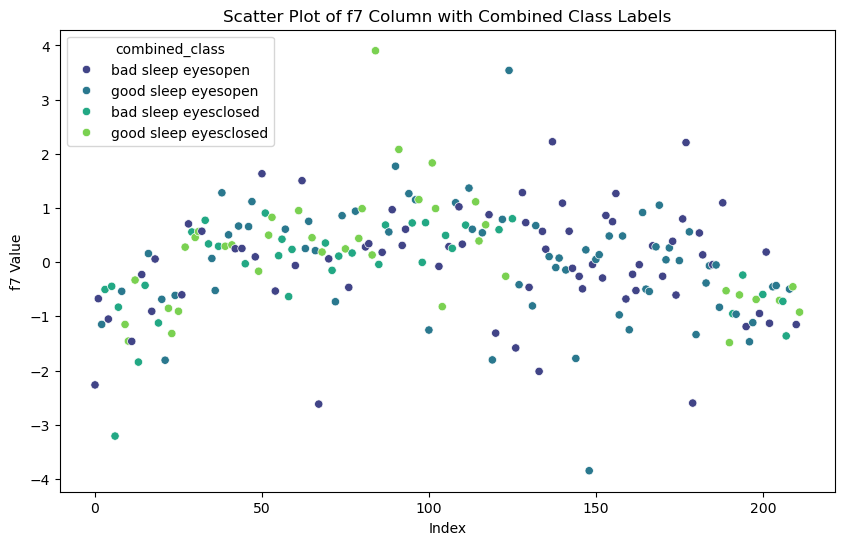

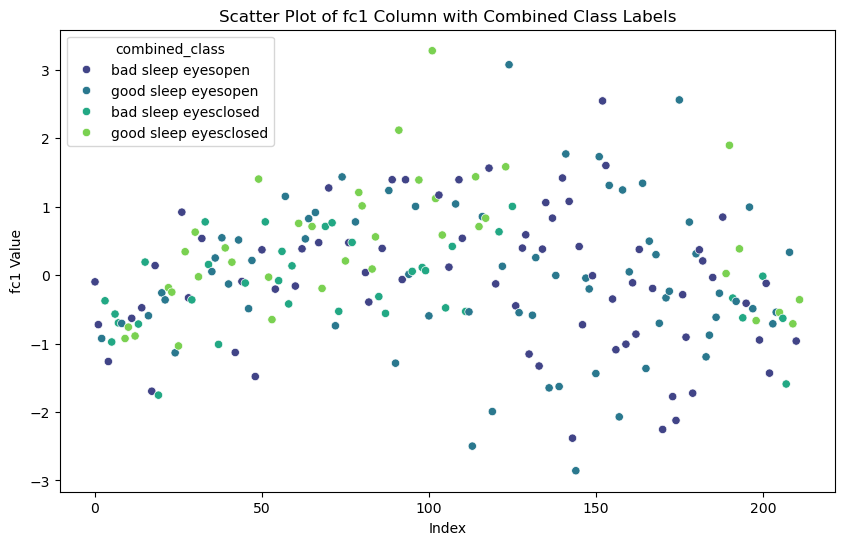

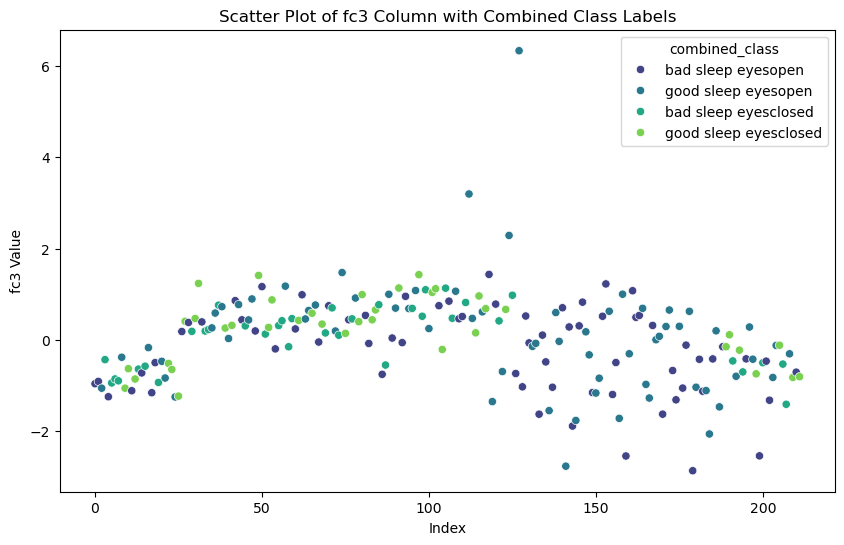

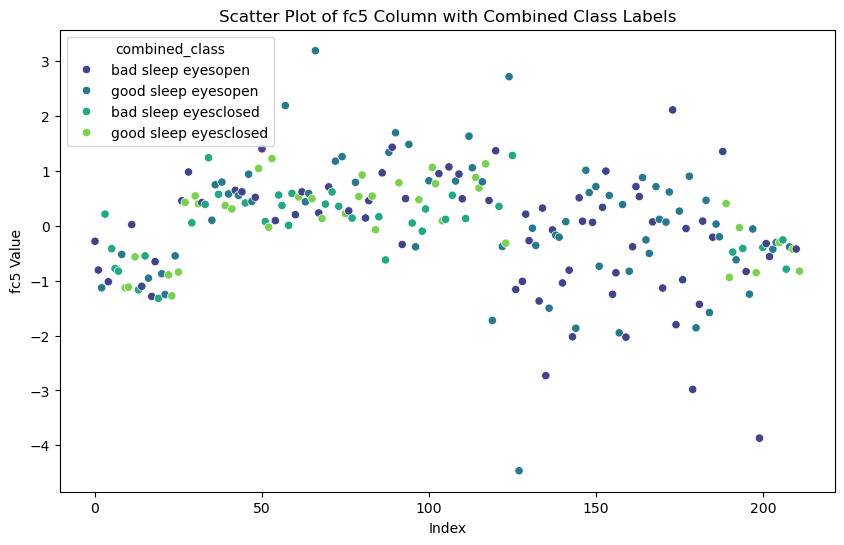

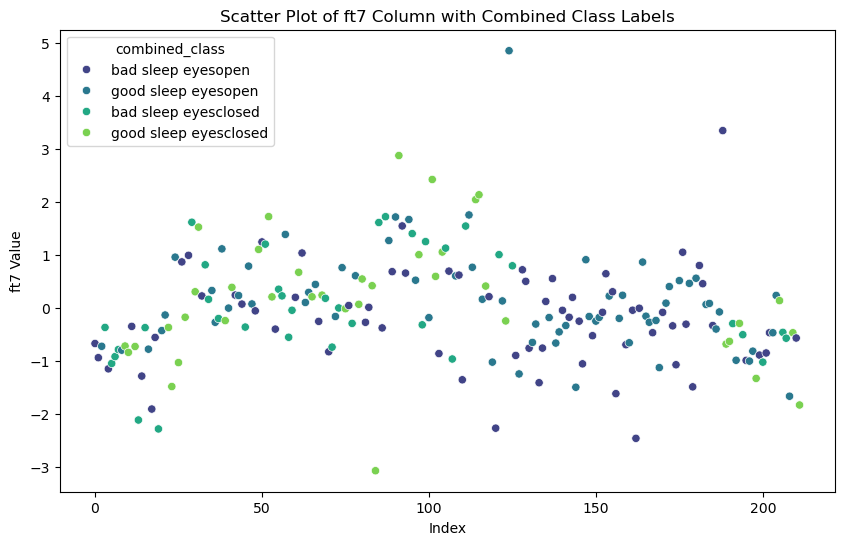

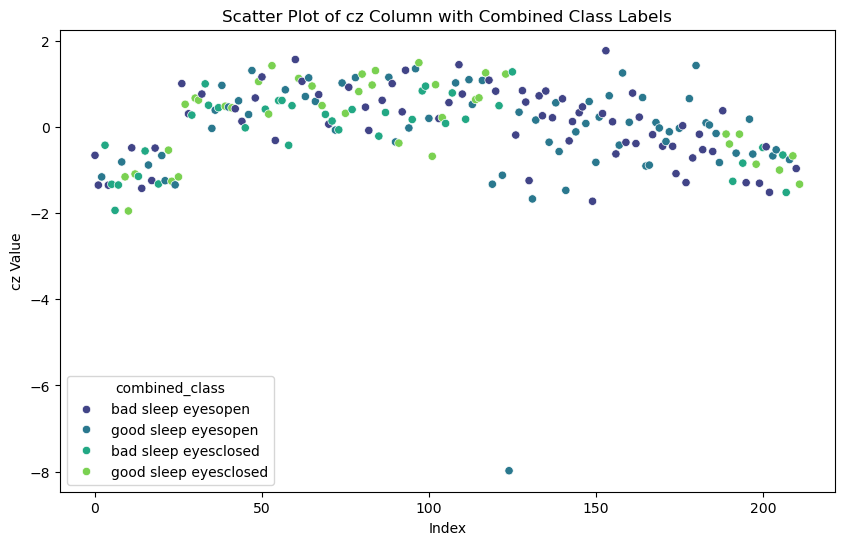

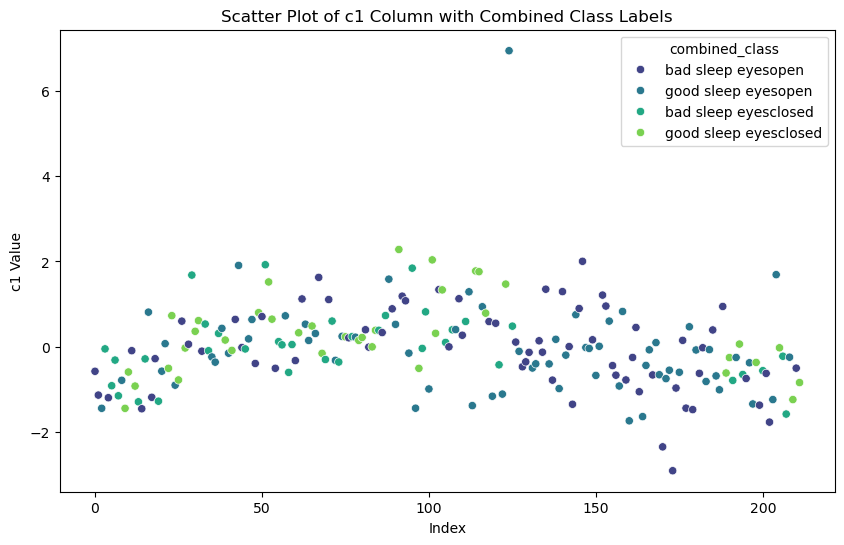

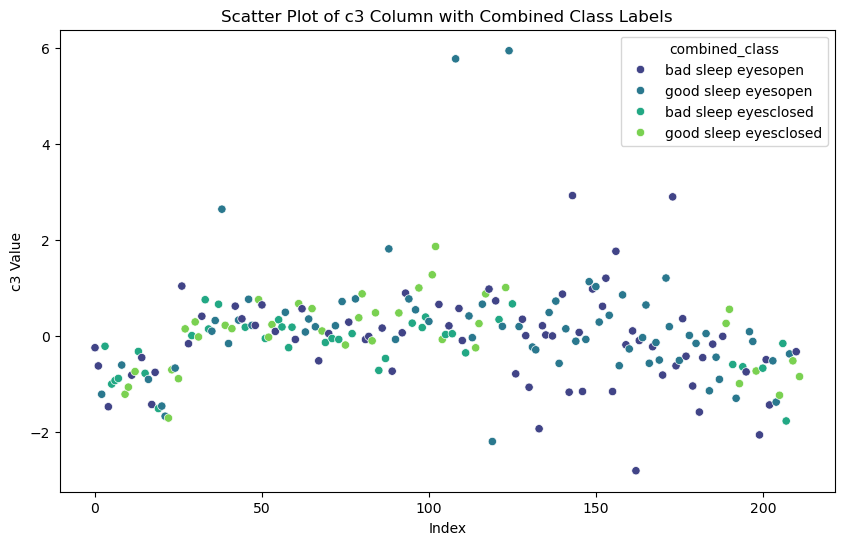

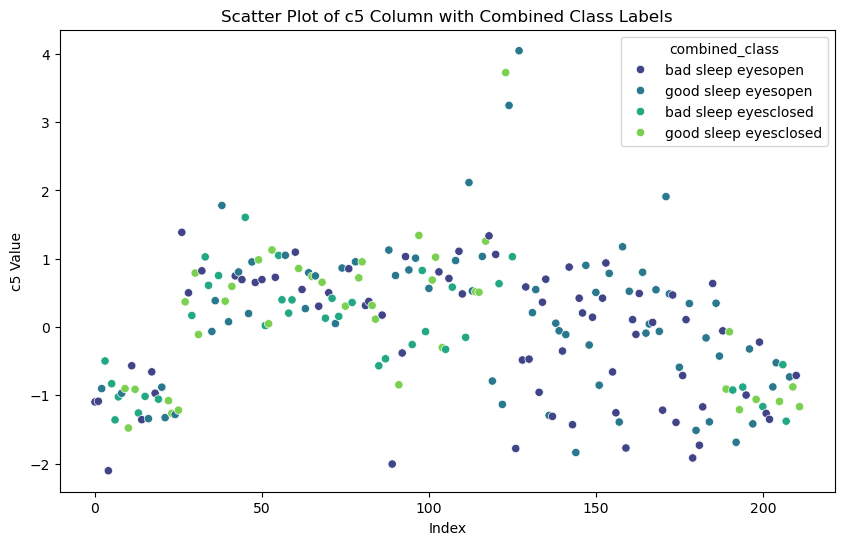

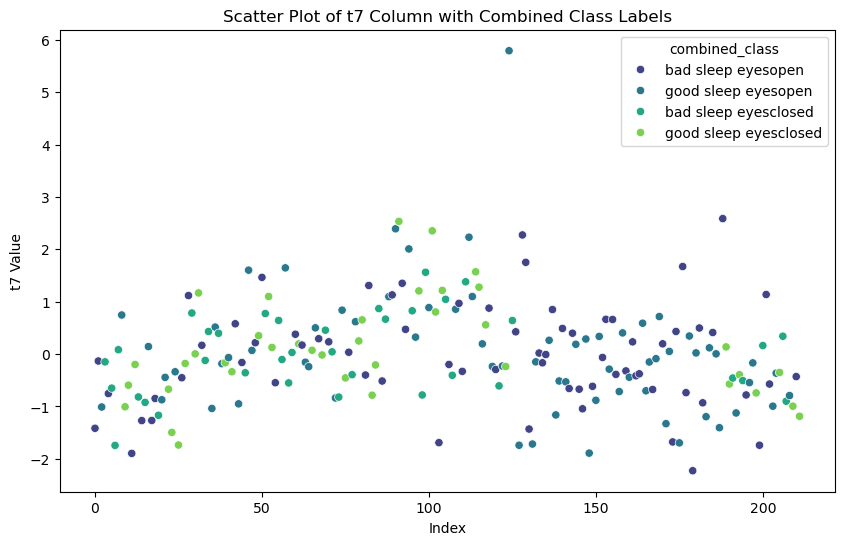

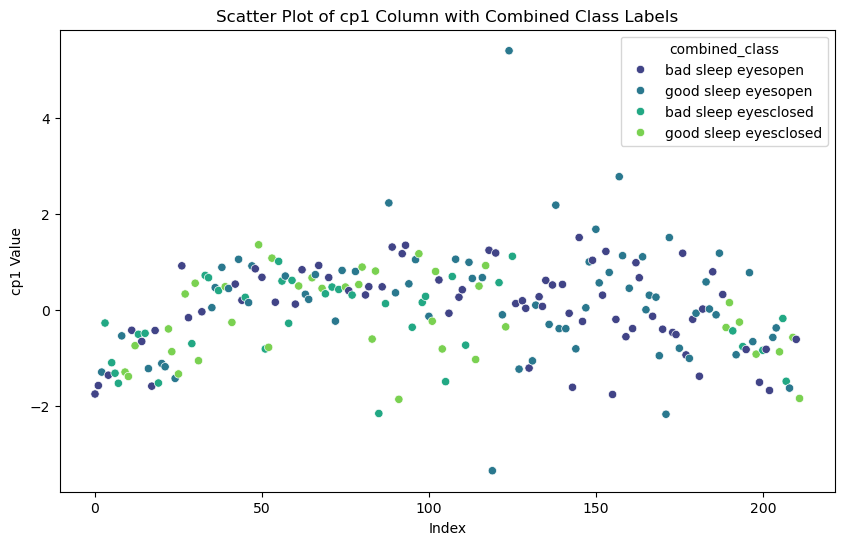

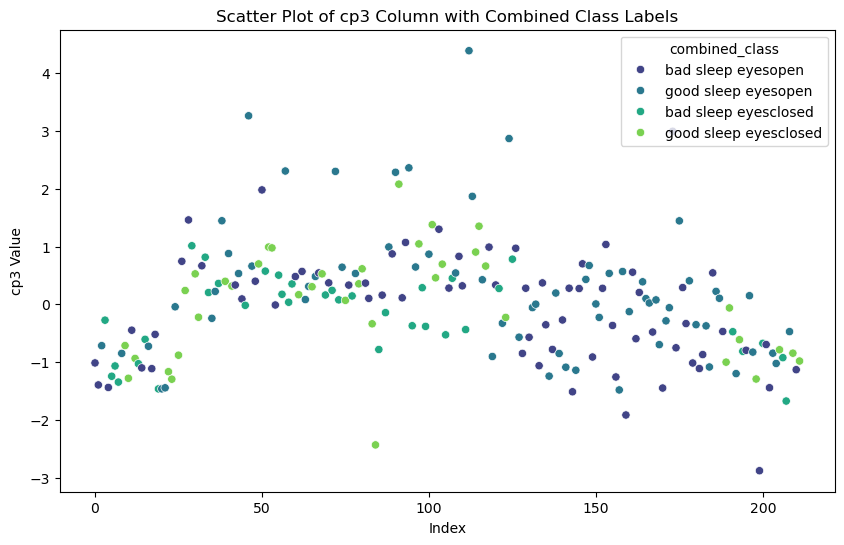

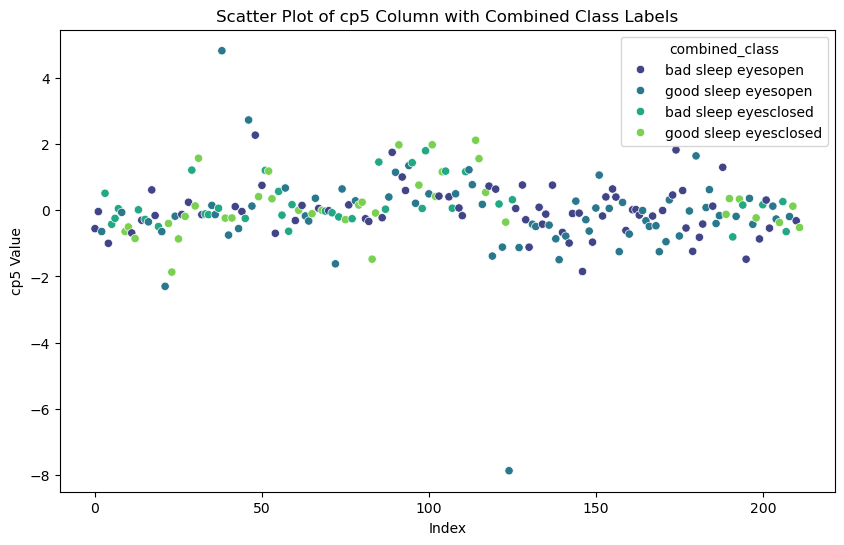

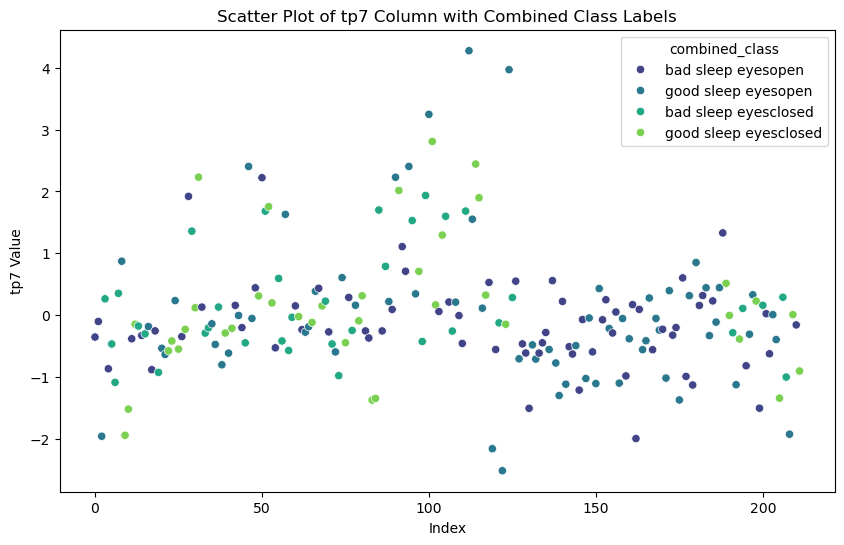

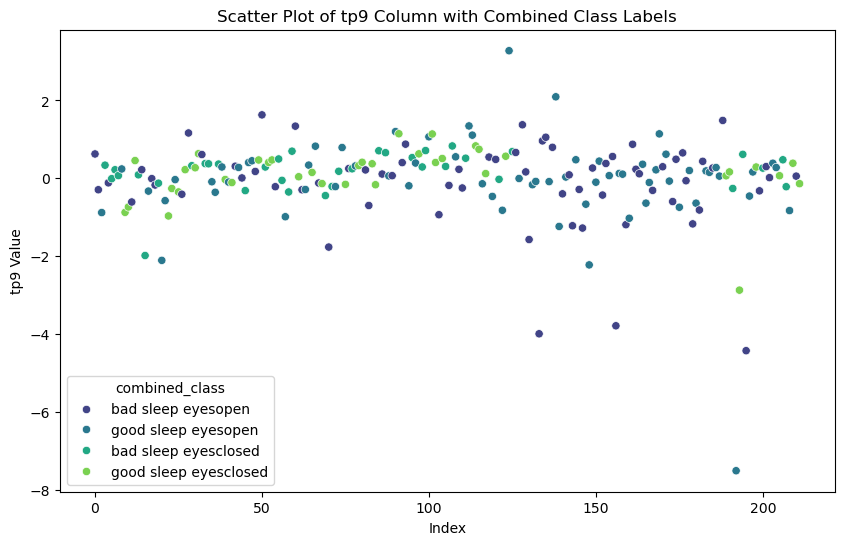

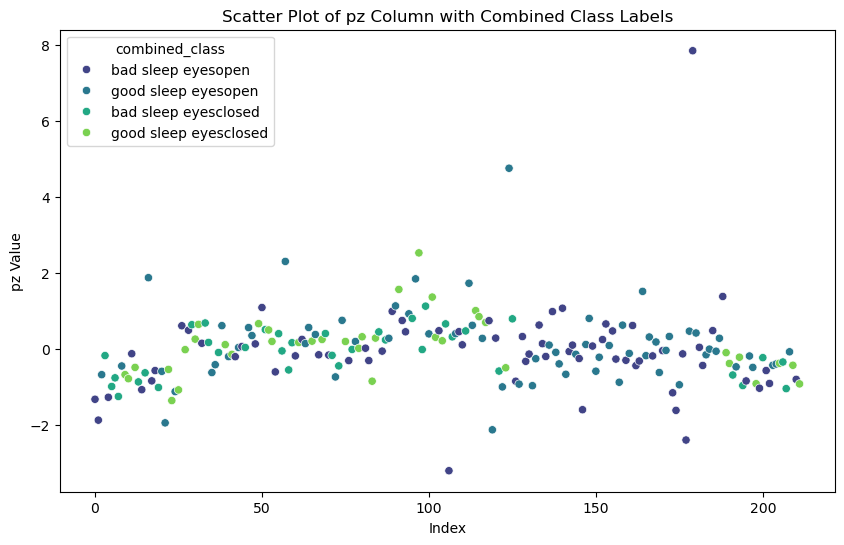

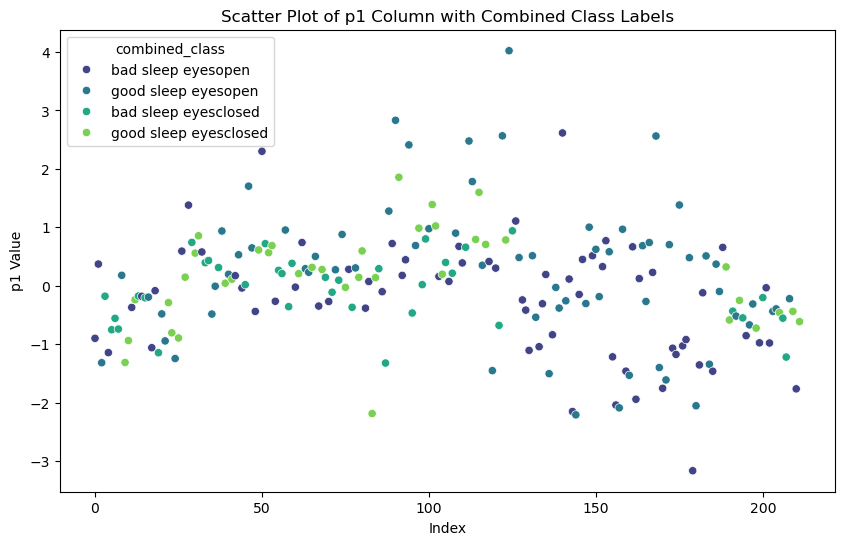

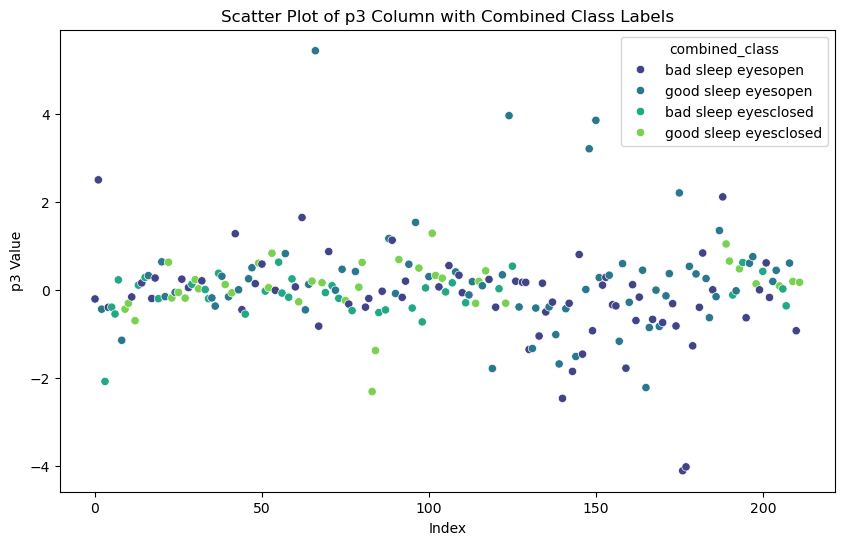

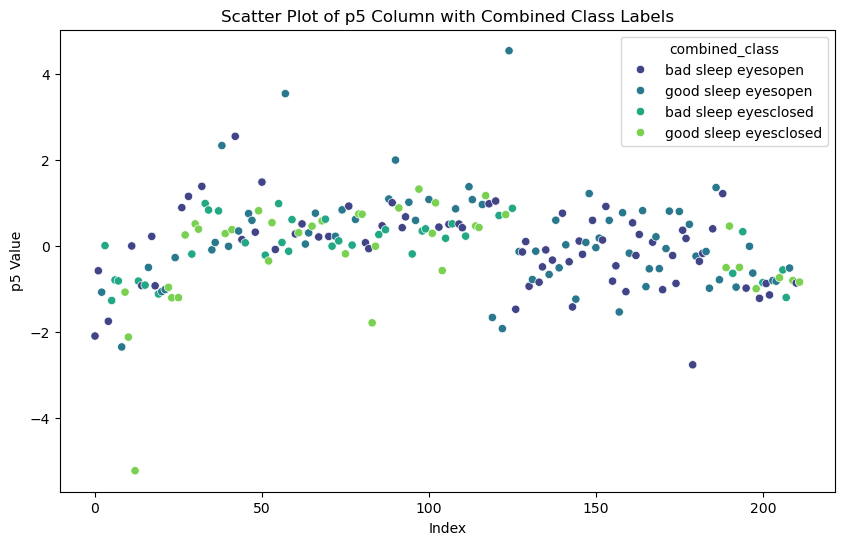

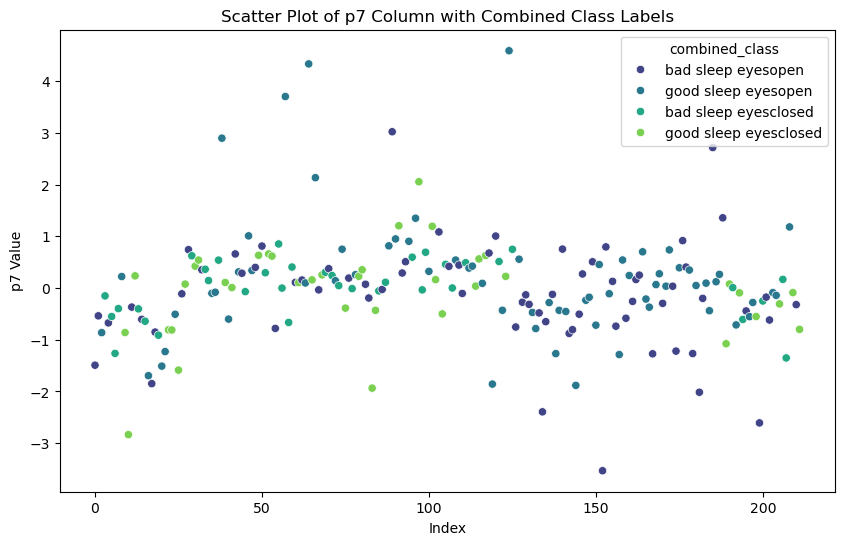

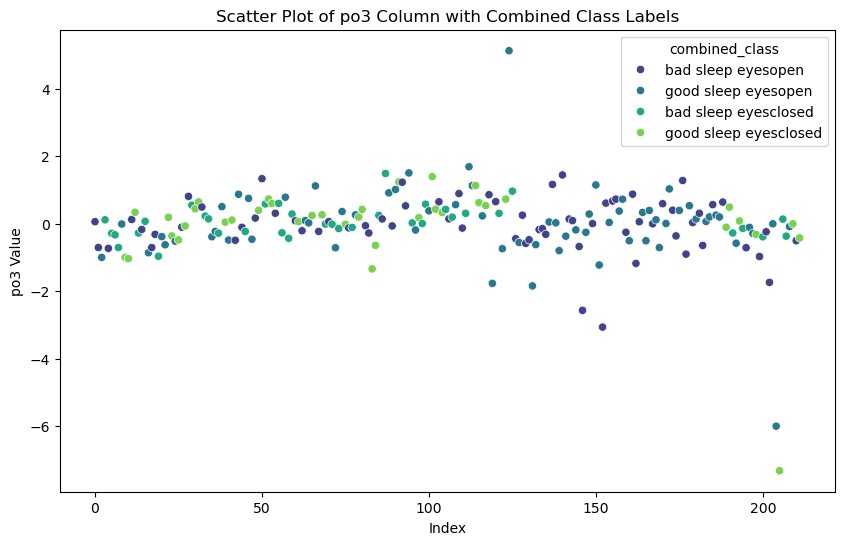

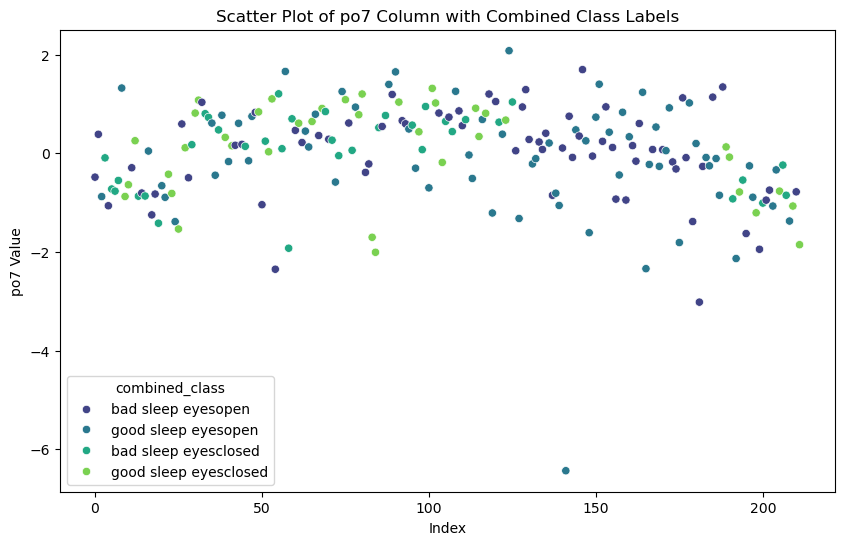

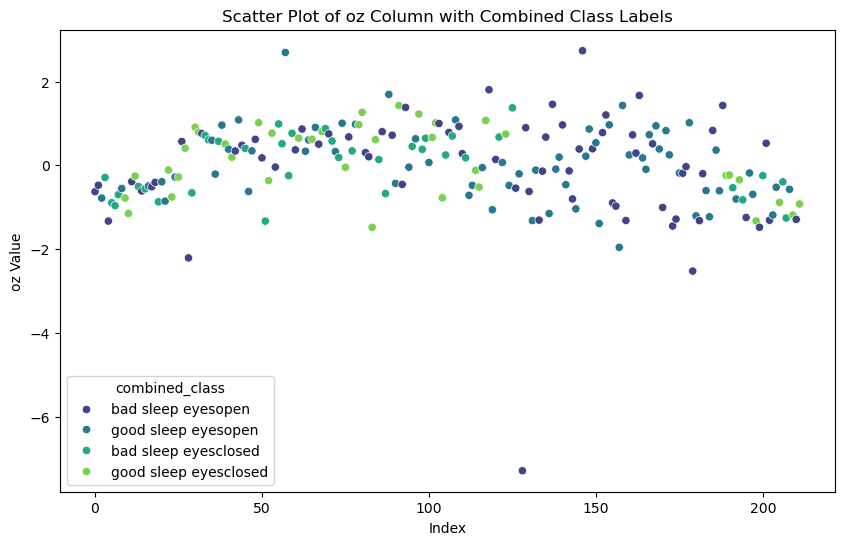

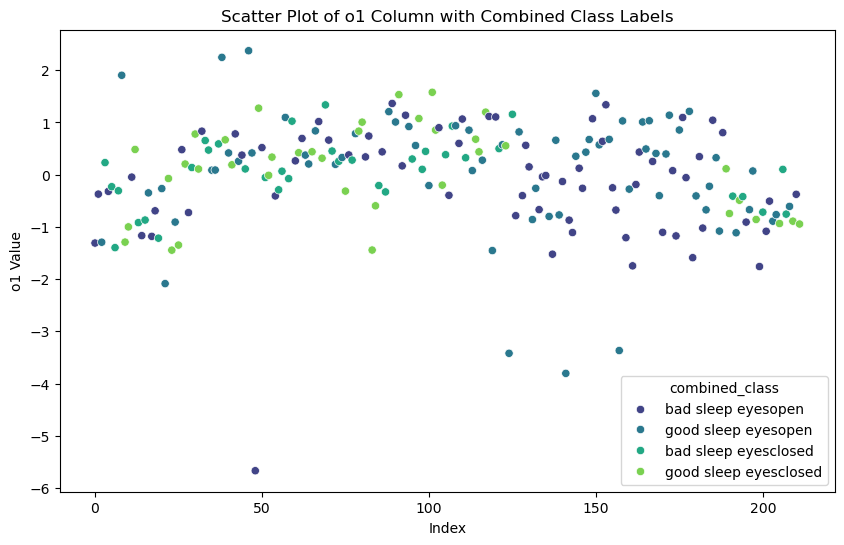

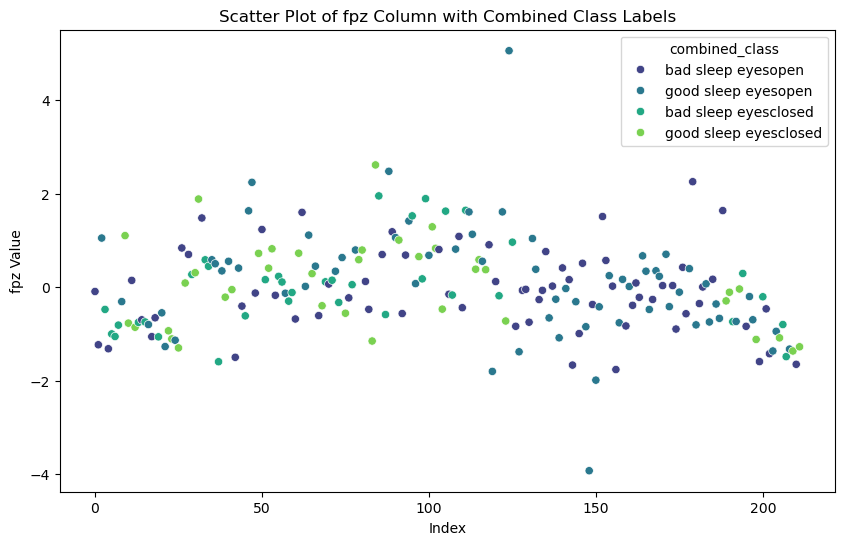

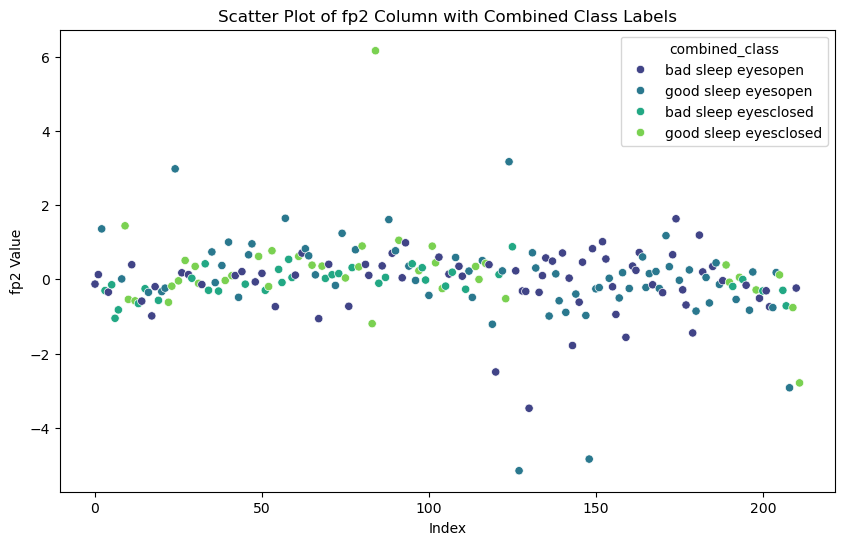

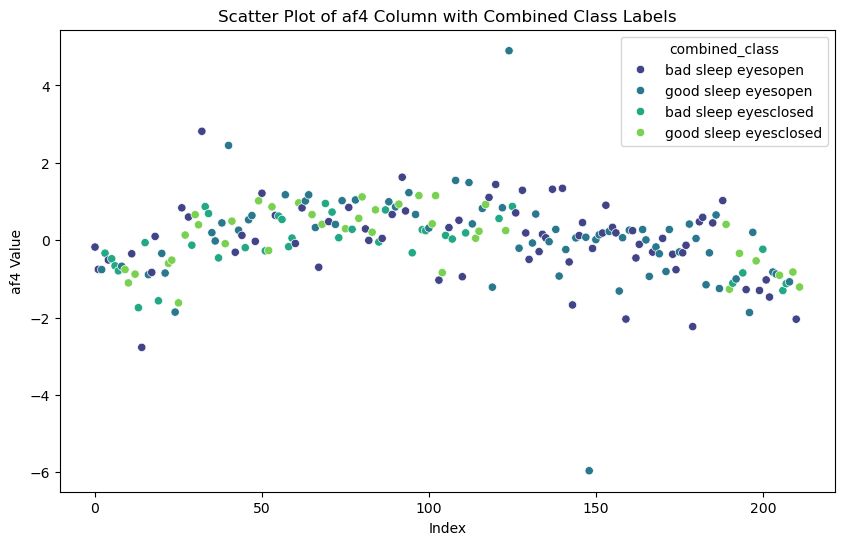

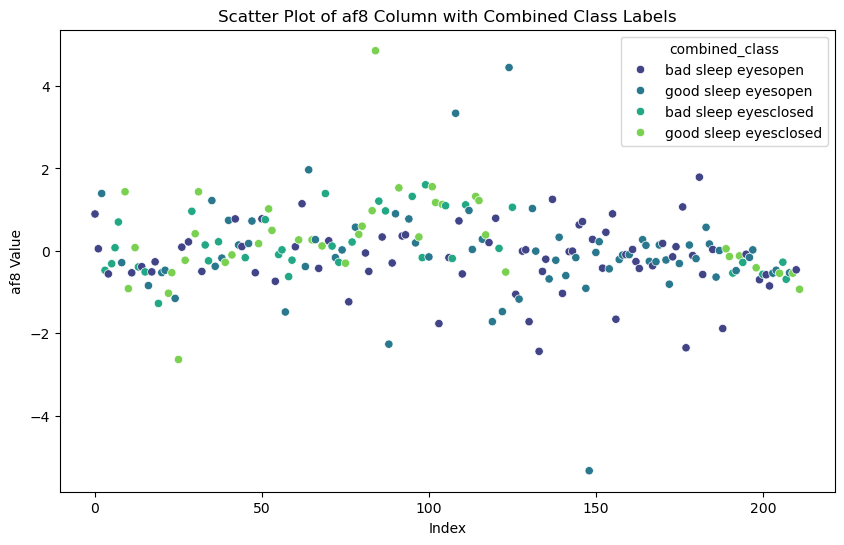

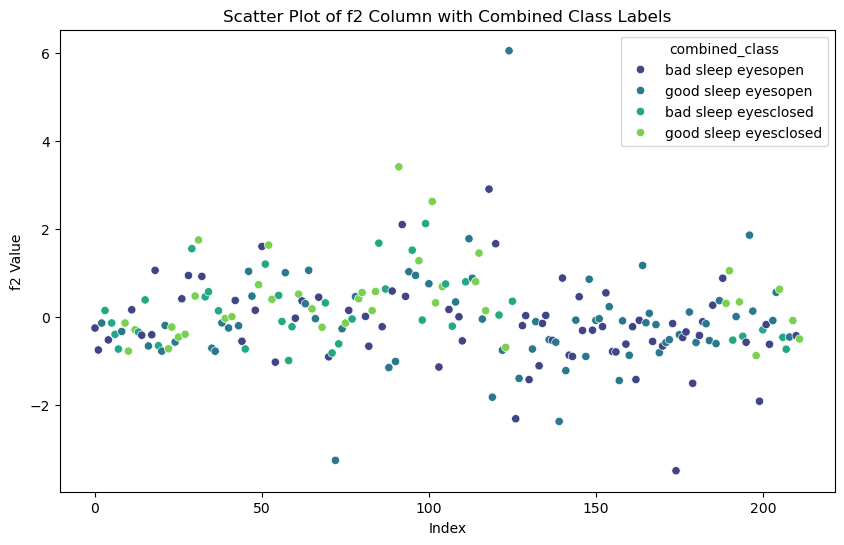

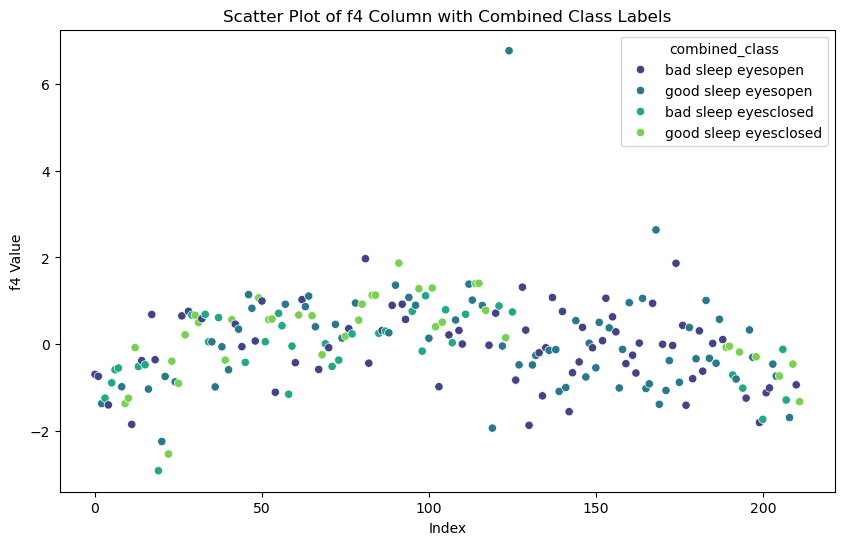

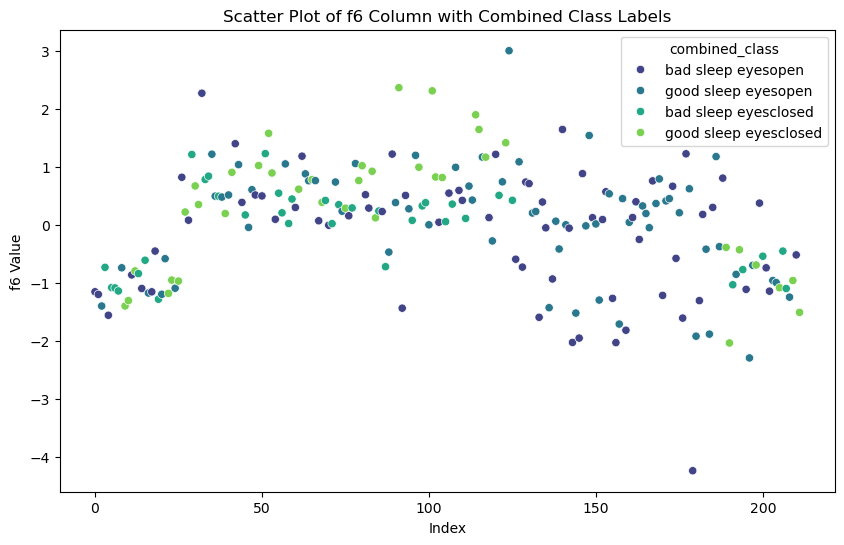

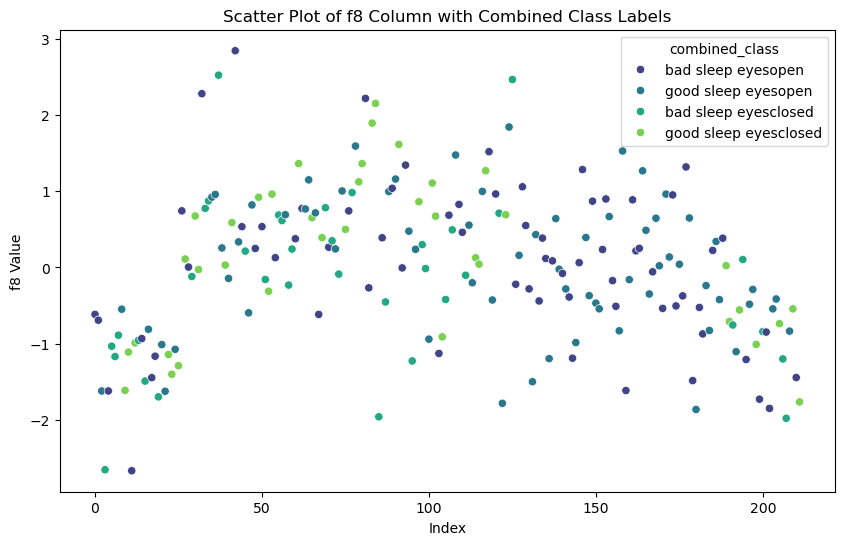

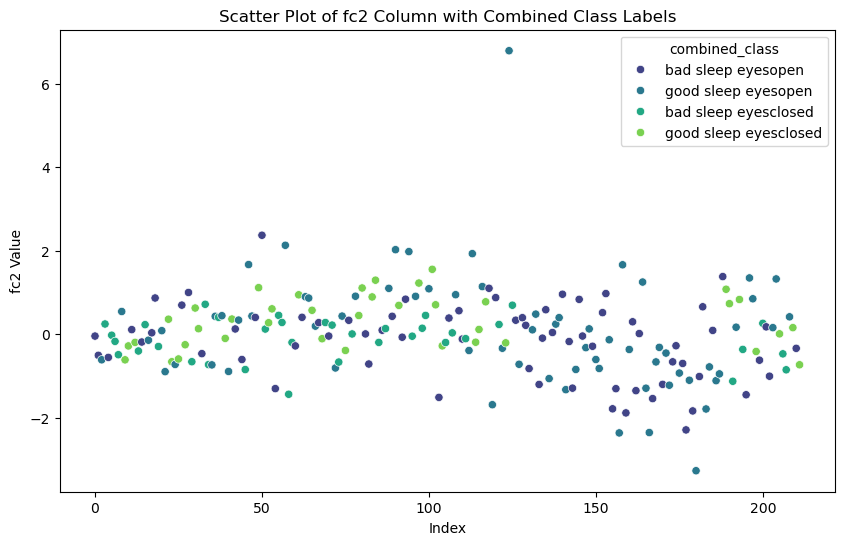

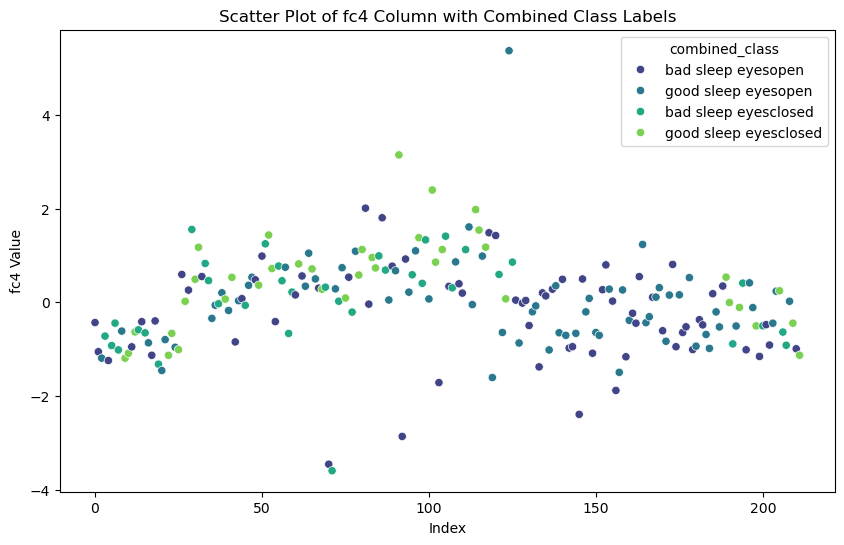

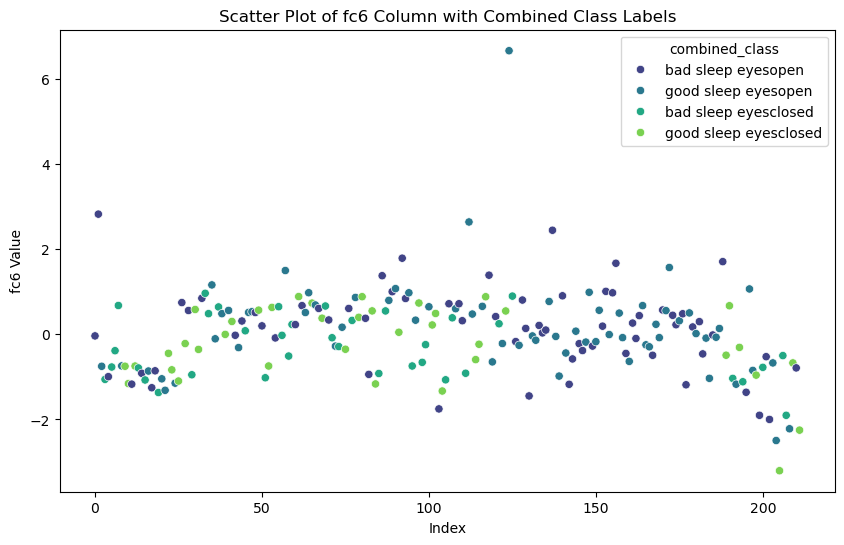

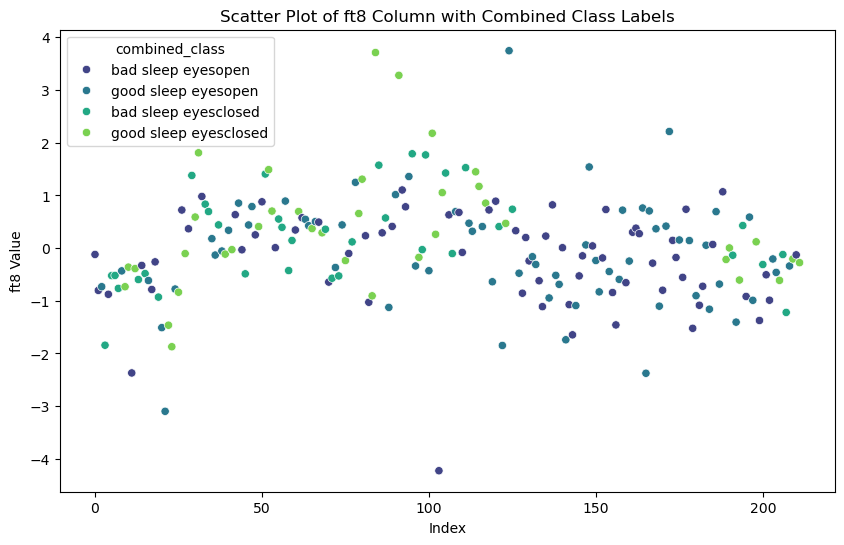

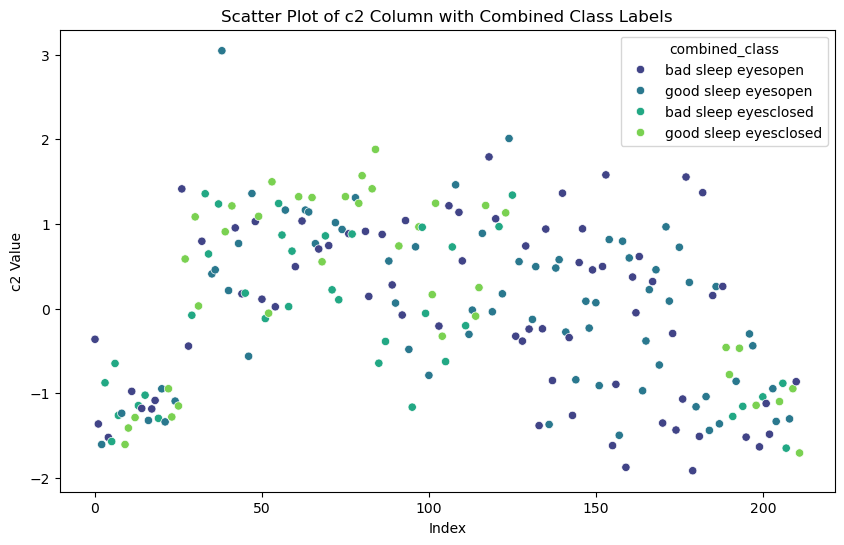

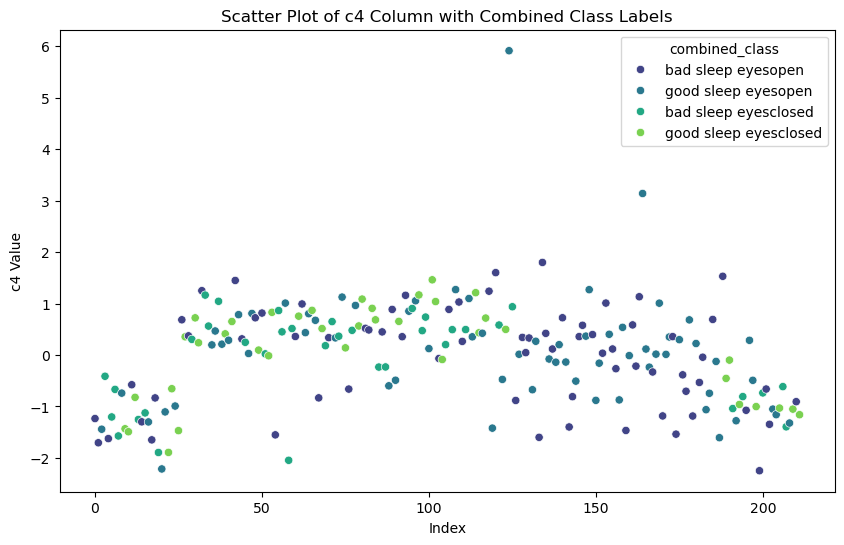

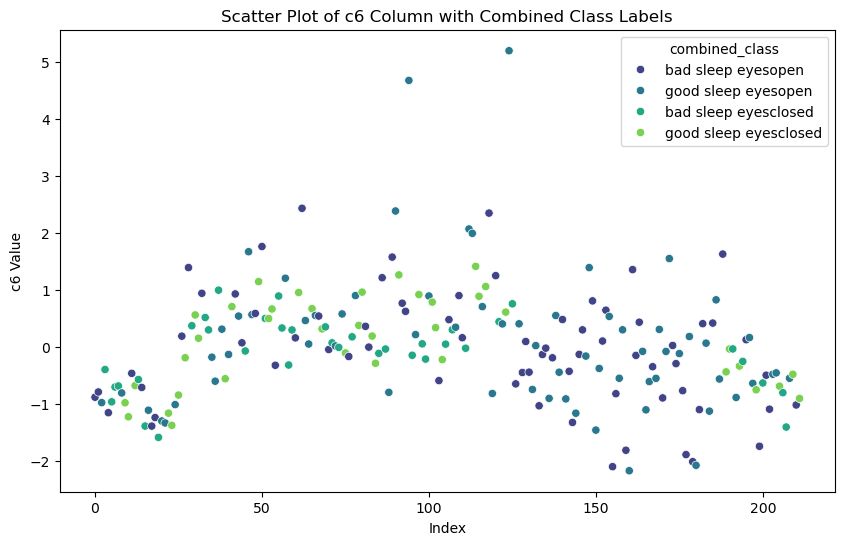

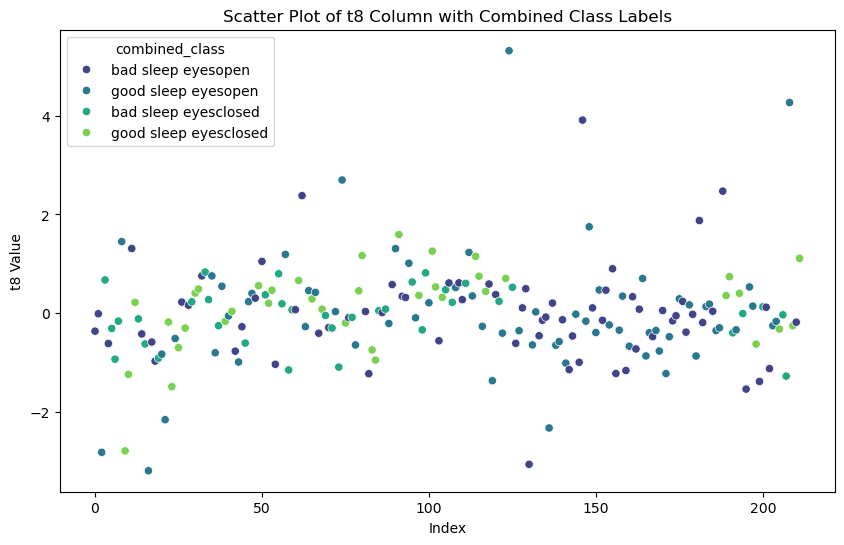

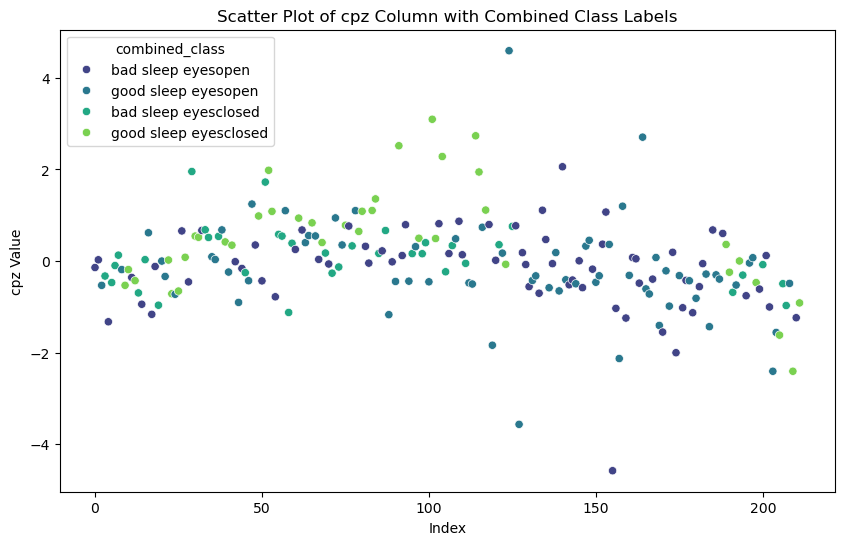

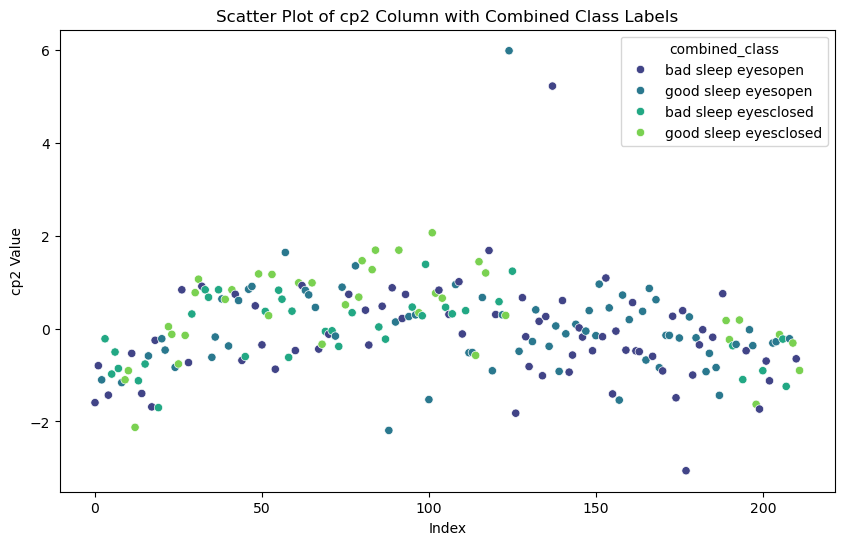

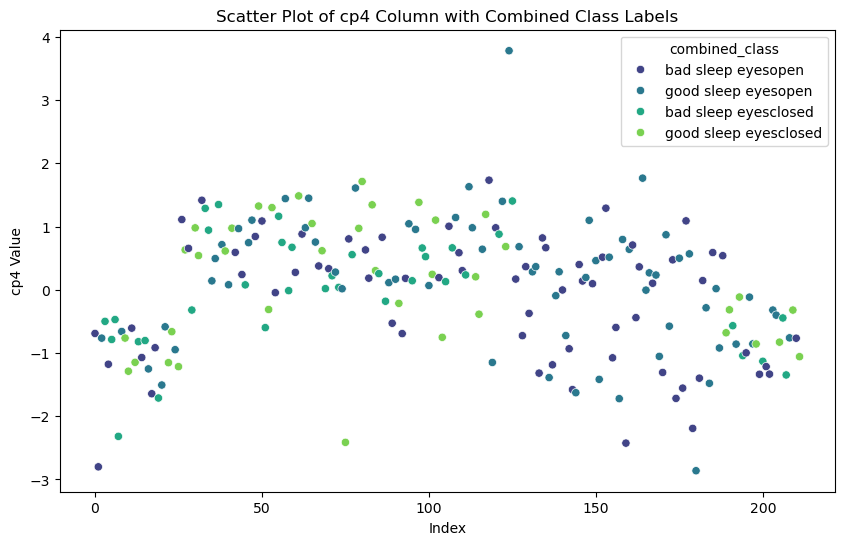

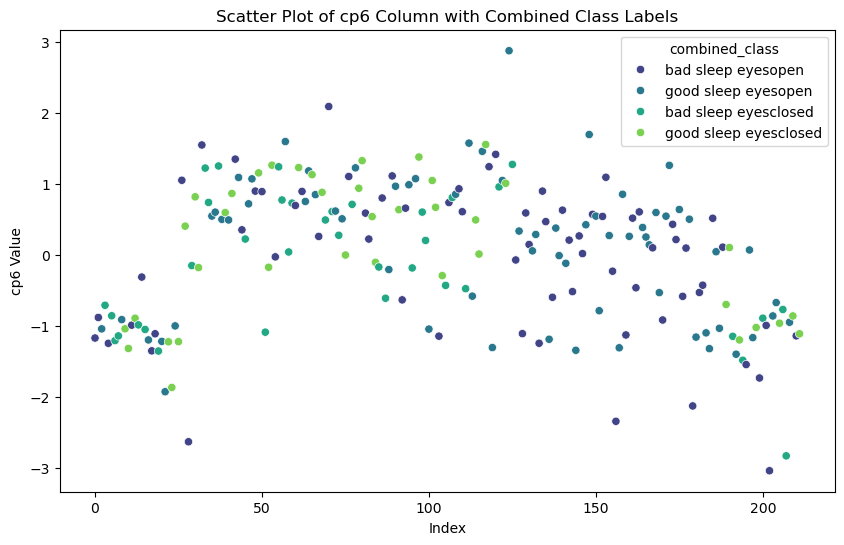

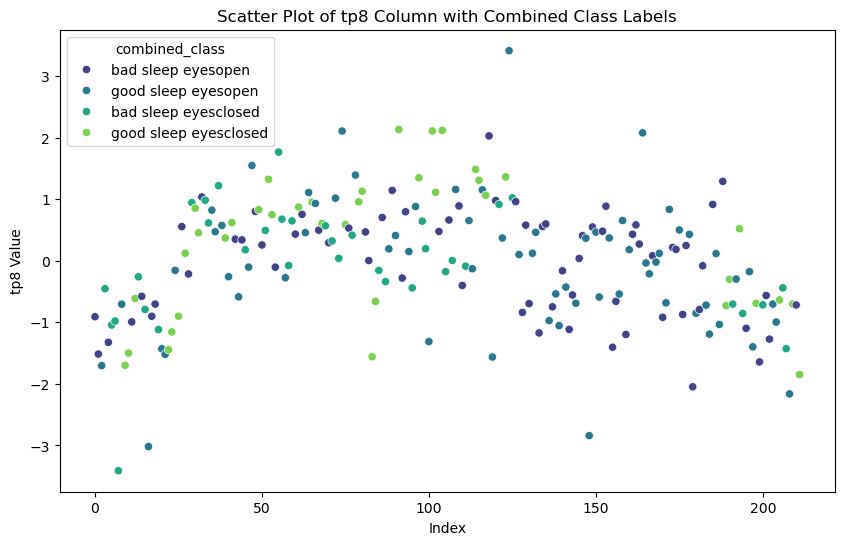

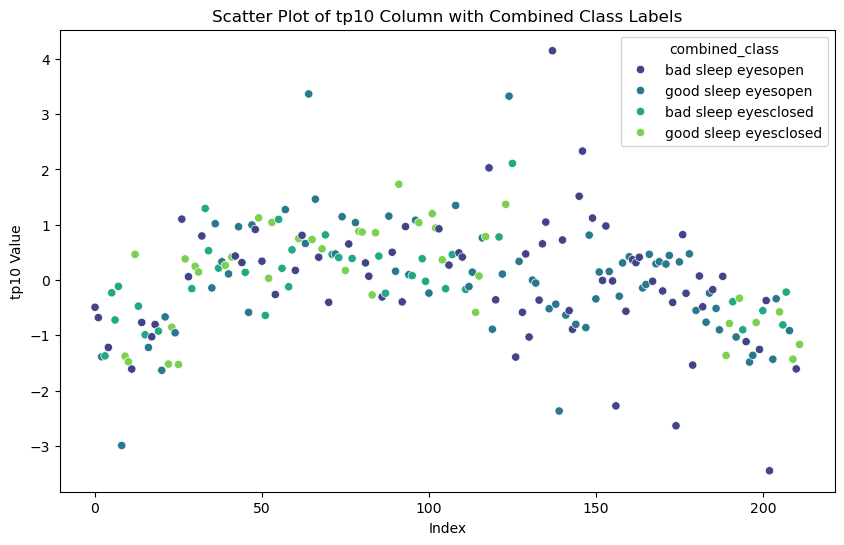

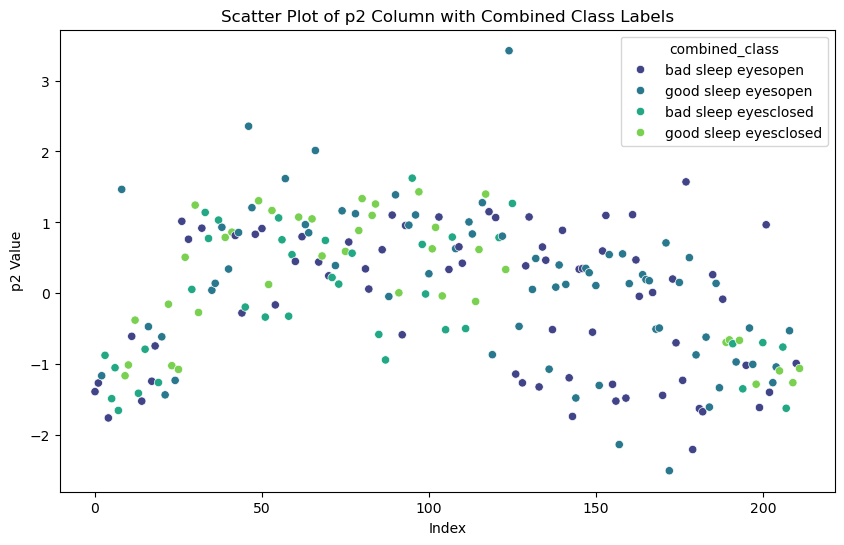

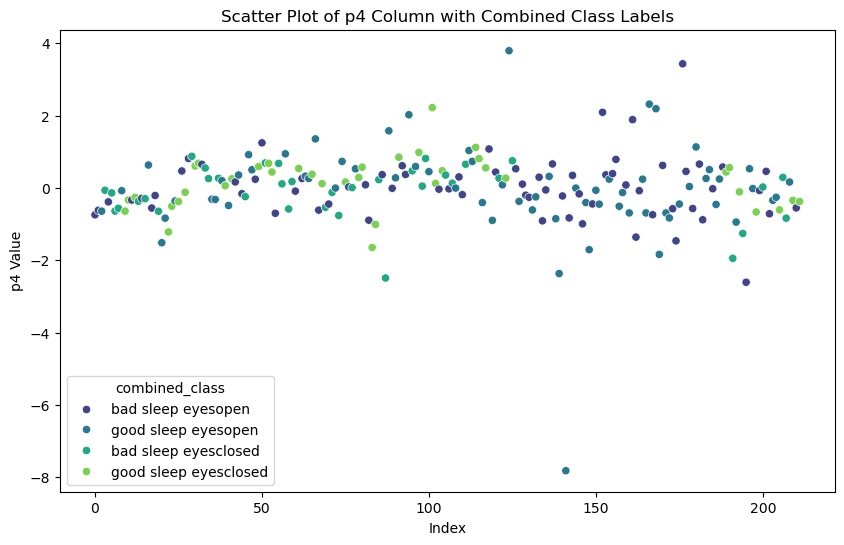

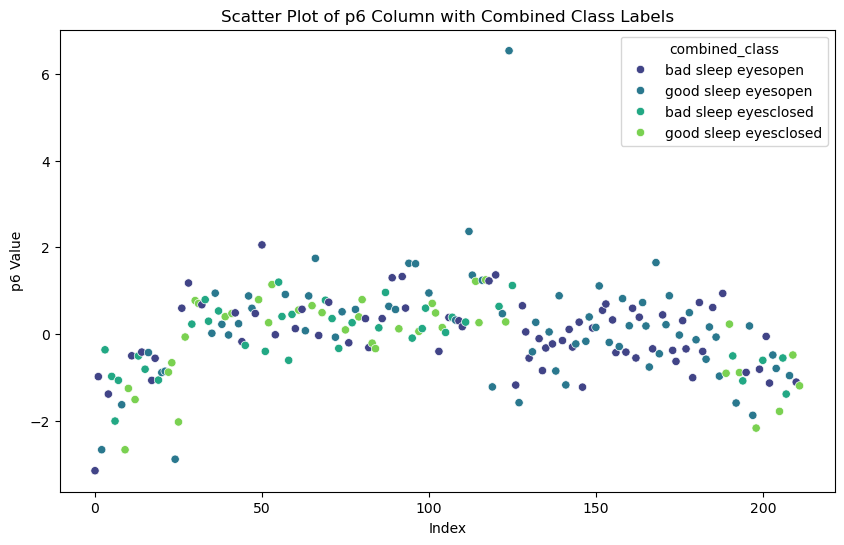

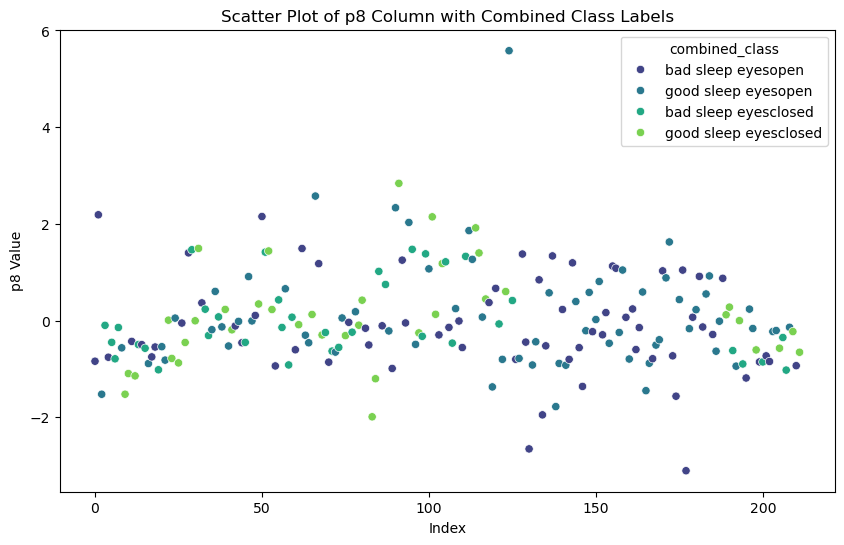

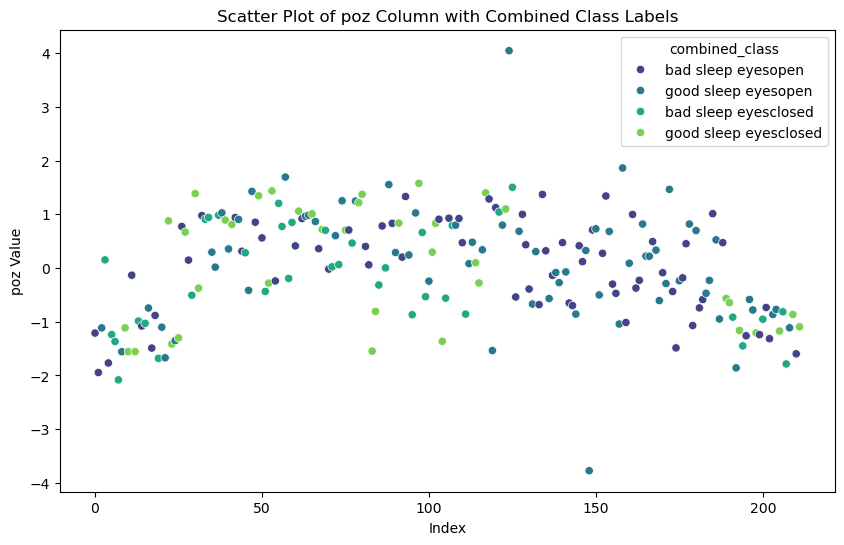

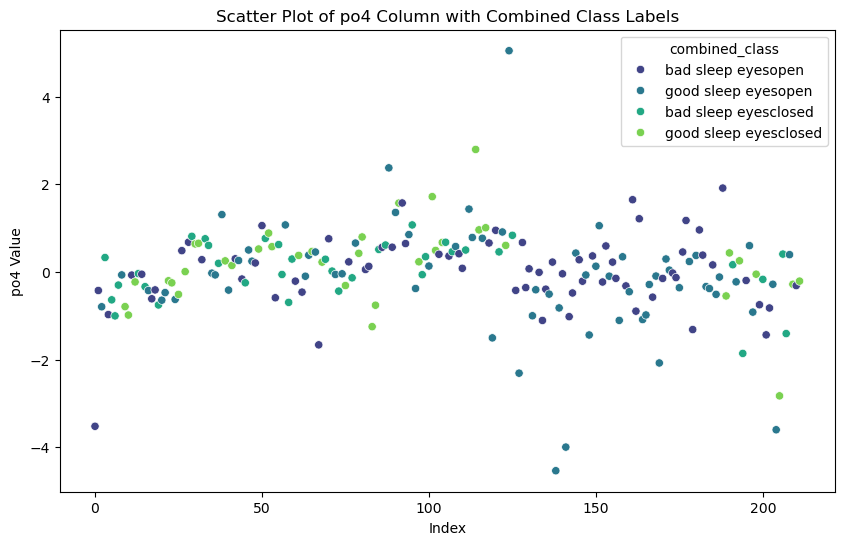

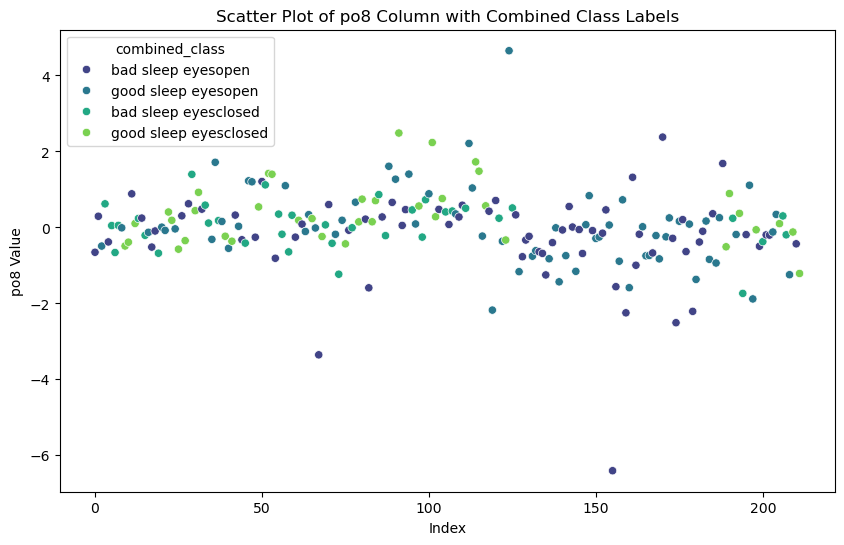

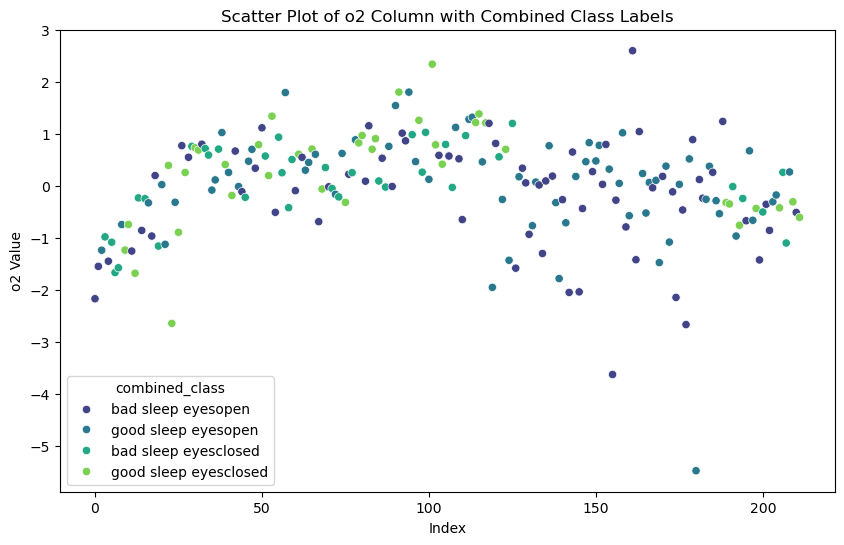

                            fp1       af3       af7        fz        f1  \
combined_class                                                            
bad sleep eyesclosed  -0.140351 -0.083827  0.006251 -0.154142  0.098507   
bad sleep eyesopen    -0.072484  0.111009 -0.082946 -0.075437 -0.223551   
good sleep eyesclosed  0.204438 -0.011176  0.184902  0.124366  0.350967   
good sleep eyesopen    0.034675 -0.063650 -0.021252  0.089761 -0.018154   

                             f3        f5        f7       fc1       fc3  ...  \
combined_class                                                           ...   
bad sleep eyesclosed   0.001259  0.214176 -0.107418 -0.167359  0.049941  ...   
bad sleep eyesopen    -0.108458 -0.213226 -0.019408 -0.096597 -0.225504  ...   
good sleep eyesclosed  0.105130  0.165225  0.161485  0.412680  0.226182  ...   
good sleep eyesopen    0.052233  0.013779 -0.013394 -0.042575  0.079301  ...   

                            tp8      tp10        p2        p4       

In [40]:
import seaborn as sns


def plot_f3_scatter(eeg_data, ch_names):
    # Create a new column for combined class labels
    eeg_data['combined_class'] = eeg_data['sleep_status'] + ' ' + eeg_data['status_eye']

    for ch in ch_names:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=eeg_data, x=eeg_data.index, y=ch, hue='combined_class', palette='viridis')
        plt.title(f'Scatter Plot of {ch} Column with Combined Class Labels')
        plt.xlabel('Index')
        plt.ylabel(f'{ch} Value')
        plt.show()
        
    # Select only numeric columns for grouping and calculating mean
    numeric_cols = eeg_data.select_dtypes(include=[np.number]).columns
    grouped_data = eeg_data.groupby(['combined_class'])[numeric_cols].mean()
    print(grouped_data)

plot_f3_scatter(eeg_data, eeg_data.columns[2:])

fz     13.398506
cp5    12.680810
po3    12.456100
f5     12.298223
p4     11.614839
         ...    
fc1     6.138825
p2      5.923523
cp6     5.913506
f8      5.515559
c2      4.961095
Length: 61, dtype: float64


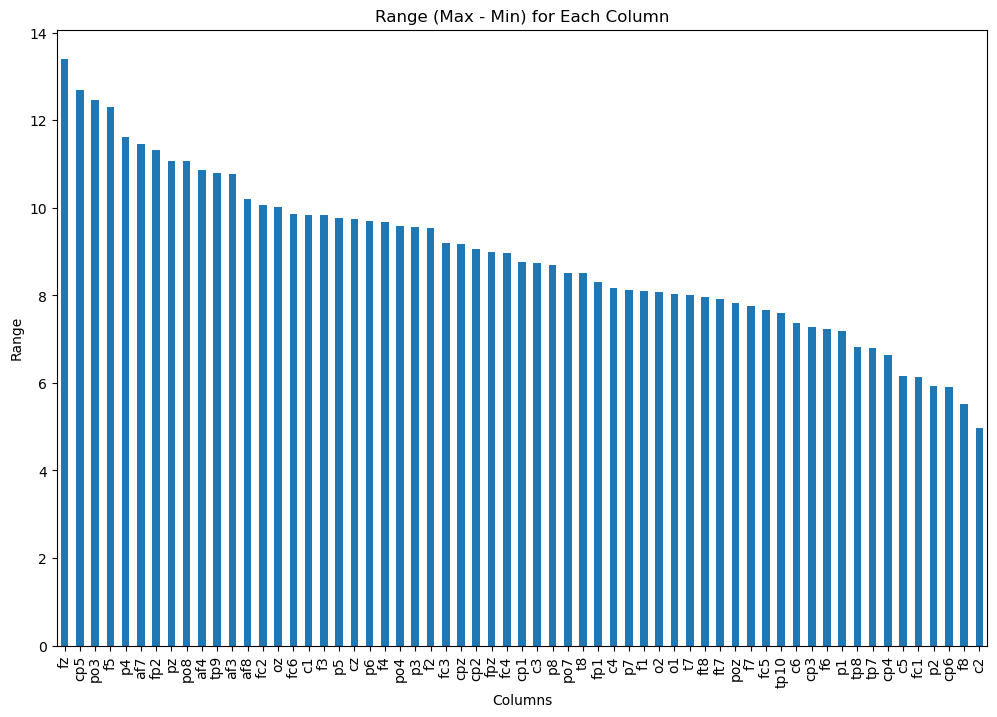

In [41]:
# Calculate the range (max - min) for each column
range_per_column = eeg_data.select_dtypes(include=[np.number]).apply(lambda x: x.max() - x.min())

# Sort the ranges in descending order
sorted_range = range_per_column.sort_values(ascending=False)

# Display the sorted ranges
print(sorted_range)
import matplotlib.pyplot as plt

# Plot the sorted ranges
plt.figure(figsize=(12, 8))
sorted_range.plot(kind='bar')
plt.title('Range (Max - Min) for Each Column')
plt.xlabel('Columns')
plt.ylabel('Range')
plt.show()



In [42]:
top_10_indices = sorted_range.index[:5].tolist()
print(top_10_indices)

['fz', 'cp5', 'po3', 'f5', 'p4']


In [43]:
# eeg_data = eeg_data[['tp9', 'fp2','sleep_status', 'status_eye']]

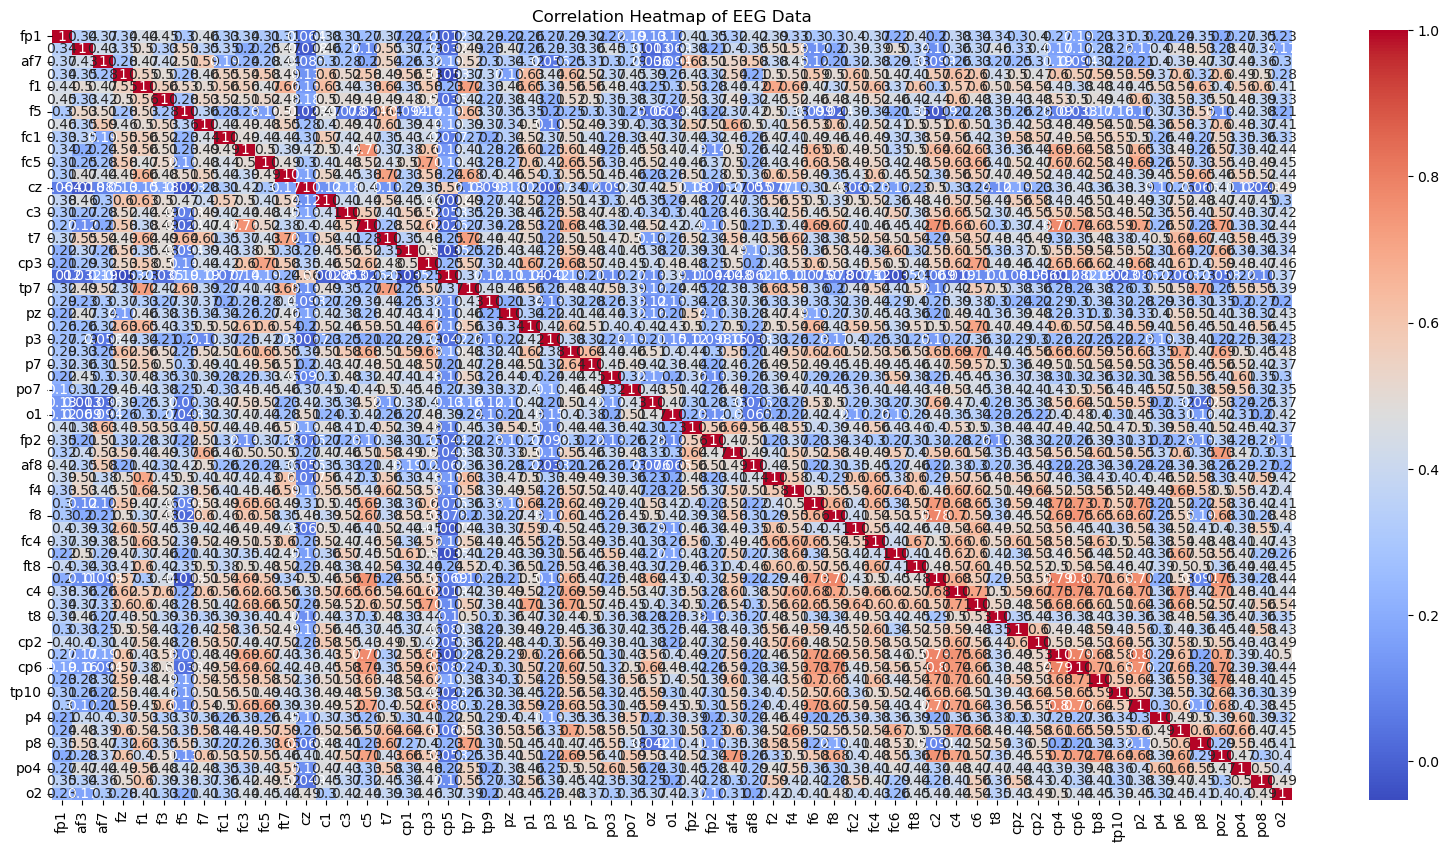

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
eeg_data_numeric = eeg_data.select_dtypes(include=[np.number])

# Set the size of the plot
plt.figure(figsize=(20, 10))

# Create a heatmap of the EEG data
sns.heatmap(eeg_data_numeric.corr(), annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Heatmap of EEG Data')

# Display the plot
plt.show()

In [45]:
eeg_data["sleep_status"].value_counts()

sleep_status
bad sleep     106
good sleep    106
Name: count, dtype: int64

In [46]:
nan_per_rows = eeg_data.isnull().sum(axis=1)

212


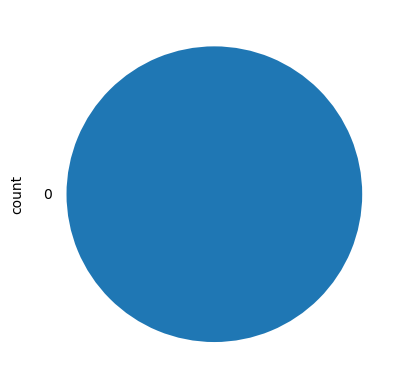

In [47]:
nan_per_rows.value_counts().plot(kind='pie')

nan_mean_values = int(nan_per_rows.value_counts().mean())
print(nan_mean_values)

In [59]:
import numpy as np
from sklearn.metrics import confusion_matrix

def custom_classification_report(y_true, y_pred, target_names, class_indices):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Initialize lists to store precision, recall, F1-score, and support for each class
    precision = []
    recall = []
    f1_score = []
    support = []

    # Calculate precision, recall, F1-score for each class
    for i in range(len(target_names)):
        true_positives = cm[i, i]
        false_positives = cm[:, i].sum() - true_positives
        false_negatives = cm[i, :].sum() - true_positives
        true_negatives = cm.sum() - (true_positives + false_positives + false_negatives)

        # Precision: TP / (TP + FP)
        if true_positives + false_positives > 0:
            precision_i = true_positives / (true_positives + false_positives)
        else:
            precision_i = 0.0

        # Recall: TP / (TP + FN)
        if true_positives + false_negatives > 0:
            recall_i = true_positives / (true_positives + false_negatives)
        else:
            recall_i = 0.0

        # F1-Score: 2 * (Precision * Recall) / (Precision + Recall)
        if precision_i + recall_i > 0:
            f1_i = 2 * (precision_i * recall_i) / (precision_i + recall_i)
        else:
            f1_i = 0.0

        # Support: The number of true instances of each class
        support_i = cm[i, :].sum()

        # Append calculated metrics for this class
        precision.append(precision_i)
        recall.append(recall_i)
        f1_score.append(f1_i)
        support.append(support_i)

    # Calculate accuracy
    accuracy = np.trace(cm) / np.sum(cm)

    # Calculate average F1-score for specified classes
    f1_average = np.mean([f1_score[i] for i in class_indices])

    # Print the aesthetically improved report
    print("\n" + "Classification Report".center(65, "="))
    print(f"{'Class':<15}{'Precision':>12}{'Recall':>12}{'F1-Score':>12}{'Support':>12}")
    print("=" * 65)
    for i, label in enumerate(target_names):
        print(f"{label:<15}{precision[i]:>12.4f}{recall[i]:>12.4f}{f1_score[i]:>12.4f}{support[i]:>12}")
    print("=" * 65)
    print(f"Average F1-Score for classes : {f1_average:.4f}")
    print("=" * 65)

class_indices = [0, 1]

In [60]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# drop rows with missing values over nan_mean_values
eeg_state_cleaned = eeg_data.dropna(thresh=eeg_data.shape[1] - nan_mean_values)
# eeg_state_cleaned = eeg_data.dropna(thresh=eeg_data.shape[1]-11)



le = LabelEncoder()
eeg_state_cleaned['sleep_status'] = le.fit_transform(eeg_state_cleaned['sleep_status'])

# Convert object columns to numeric
for col in eeg_state_cleaned.columns:
    if eeg_state_cleaned[col].dtype == 'object':
        eeg_state_cleaned[col] = pd.to_numeric(eeg_state_cleaned[col], errors='coerce')

# Features and target
X = eeg_state_cleaned.drop(['sleep_status','status_eye','combined_class'], axis=1)
y = eeg_state_cleaned['sleep_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# params = {
#     'objective': 'multi:softmax',
#     'num_class': 2,  # Number of classes
#     'learning_rate': 0.2087759602169422,
#     'max_depth': 7,
#     'subsample': 0.6478457734751482,
#     'colsample_bytree': 0.9431214021788126,
#     'device': 'cuda',  # Use GPU
#     'random_state': 41,
# }
# Use default parameters for XGBoost
params = {
    'objective': 'multi:softmax',
    'num_class': 2,  # Number of classes
    'device': 'cuda',  # Use GPU
    'random_state': 41,
}

train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

xgb_model = xgb.train(params, train_data,num_boost_round=462)

# Predict the class labels
y_pred = xgb_model.predict(test_data)

In [61]:
print("Expected features:", xgb_model.feature_names)
print("Dataset columns:", eeg_state_cleaned.columns.tolist())

Expected features: ['fp1', 'af3', 'af7', 'fz', 'f1', 'f3', 'f5', 'f7', 'fc1', 'fc3', 'fc5', 'ft7', 'cz', 'c1', 'c3', 'c5', 't7', 'cp1', 'cp3', 'cp5', 'tp7', 'tp9', 'pz', 'p1', 'p3', 'p5', 'p7', 'po3', 'po7', 'oz', 'o1', 'fpz', 'fp2', 'af4', 'af8', 'f2', 'f4', 'f6', 'f8', 'fc2', 'fc4', 'fc6', 'ft8', 'c2', 'c4', 'c6', 't8', 'cpz', 'cp2', 'cp4', 'cp6', 'tp8', 'tp10', 'p2', 'p4', 'p6', 'p8', 'poz', 'po4', 'po8', 'o2']
Dataset columns: ['status_eye', 'sleep_status', 'fp1', 'af3', 'af7', 'fz', 'f1', 'f3', 'f5', 'f7', 'fc1', 'fc3', 'fc5', 'ft7', 'cz', 'c1', 'c3', 'c5', 't7', 'cp1', 'cp3', 'cp5', 'tp7', 'tp9', 'pz', 'p1', 'p3', 'p5', 'p7', 'po3', 'po7', 'oz', 'o1', 'fpz', 'fp2', 'af4', 'af8', 'f2', 'f4', 'f6', 'f8', 'fc2', 'fc4', 'fc6', 'ft8', 'c2', 'c4', 'c6', 't8', 'cpz', 'cp2', 'cp4', 'cp6', 'tp8', 'tp10', 'p2', 'p4', 'p6', 'p8', 'poz', 'po4', 'po8', 'o2', 'combined_class']


In [62]:
target_names=list(map(str,le.classes_))

In [63]:
# Generate and print classification report
report = custom_classification_report(y_test, y_pred, target_names=target_names,class_indices = [0, 1])
print(report)


======================Classification Report======================
Class             Precision      Recall    F1-Score     Support
bad sleep            0.5000      0.4545      0.4762          22
good sleep           0.4783      0.5238      0.5000          21
Average F1-Score for classes : 0.4881
None


In [64]:
from sklearn.metrics import accuracy_score

# Predict the class labels
y_pred = xgb_model.predict(test_data)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 48.84%


In [65]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# create func confusion matrix

def custom_confusion_matrix(y_true, y_pred, target_names):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Print the aesthetically improved confusion matrix
    print("\n" + "Confusion Matrix".center(65, "="))
    print(f"{'Actual':>15}{'Predicted:':>15}")
    print(f"{'':>15}{target_names[0]:>15}{target_names[1]:>15}")
    print("=" * 65)
    for i, label in enumerate(target_names):
        print(f"{label:>15}{cm[i, 0]:>15}{cm[i, 1]:>15}")
    print("=" * 65)
    import matplotlib.pyplot as plt

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()


=========================Confusion Matrix========================
         Actual     Predicted:
                     bad sleep     good sleep
      bad sleep             10             12
     good sleep             10             11


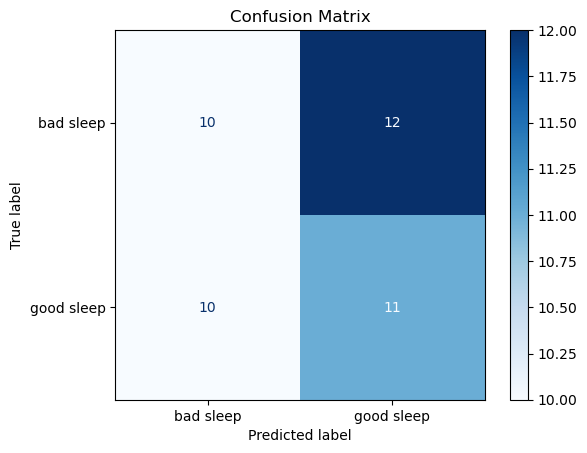

In [66]:
custom_confusion_matrix(y_test, y_pred, target_names)

In [154]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim

# Define the CNN+LSTM model
class CNNLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(CNNLSTM, self).__init__() 
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2)
        )
        self.lstm = nn.LSTM(input_size=64, hidden_size=hidden_size, num_layers=1, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.cnn(x)
        x = x.permute(0, 2, 1)  # Change the shape to (batch_size, sequence_length, features)
        x, _ = self.lstm(x)
        x = x[:, -1, :]  # Take the last output of the LSTM
        x = self.fc(x)
        return x

# Prepare the data
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 128
num_classes = len(le.classes_)
model = CNNLSTM(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Evaluate the model
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(y_batch.cpu().numpy())

# Generate and print classification report
report_cnn_lstm = custom_classification_report(y_true, y_pred, target_names=target_names, class_indices=[0, 1])
print(report_cnn_lstm)

# Calculate accuracy
accuracy_cnn_lstm = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy_cnn_lstm * 100:.2f}%")

# Calculate f1 score
f1_cnn_lstm = f1_score(y_true, y_pred, average='weighted')
print(f"F1 Score: {f1_cnn_lstm:.4f}")


Epoch [1/20], Loss: 0.6983
Epoch [2/20], Loss: 0.6864
Epoch [3/20], Loss: 0.6838
Epoch [4/20], Loss: 0.6829
Epoch [5/20], Loss: 0.6734
Epoch [6/20], Loss: 0.6663
Epoch [7/20], Loss: 0.6624
Epoch [8/20], Loss: 0.6645
Epoch [9/20], Loss: 0.6526
Epoch [10/20], Loss: 0.6739
Epoch [11/20], Loss: 0.6422
Epoch [12/20], Loss: 0.6504
Epoch [13/20], Loss: 0.6473
Epoch [14/20], Loss: 0.6306
Epoch [15/20], Loss: 0.6387
Epoch [16/20], Loss: 0.6340
Epoch [17/20], Loss: 0.6219
Epoch [18/20], Loss: 0.6211
Epoch [19/20], Loss: 0.6238
Epoch [20/20], Loss: 0.6354
              precision    recall  f1-score   support

   bad sleep       0.58      0.68      0.62        22
  good sleep       0.59      0.48      0.53        21

    accuracy                           0.58        43
   macro avg       0.58      0.58      0.58        43
weighted avg       0.58      0.58      0.58        43

Accuracy: 58.14%
F1 Score: 0.5768


In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Define a custom classifier wrapper for the CNN+LSTM model
class CNNLSTMClassifier:
    def __init__(self, input_size, hidden_size, num_classes, lr=0.001, num_epochs=20, batch_size=32):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.lr = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.model = CNNLSTM(input_size, hidden_size, num_classes)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)

    def fit(self, X, y):
        X_tensor = torch.tensor(X.values, dtype=torch.float32).unsqueeze(1)
        y_tensor = torch.tensor(y.values, dtype=torch.long)
        dataset = TensorDataset(X_tensor, y_tensor)
        loader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        for epoch in range(self.num_epochs):
            self.model.train()
            for X_batch, y_batch in loader:
                self.optimizer.zero_grad()
                outputs = self.model(X_batch)
                loss = self.criterion(outputs, y_batch)
                loss.backward()
                self.optimizer.step()

    def predict(self, X):
        X_tensor = torch.tensor(X.values, dtype=torch.float32).unsqueeze(1)
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(X_tensor)
            _, predicted = torch.max(outputs.data, 1)
        return predicted.cpu().numpy()

    def get_params(self, deep=True):
        return {
            'input_size': self.input_size,
            'hidden_size': self.hidden_size,
            'num_classes': self.num_classes,
            'lr': self.lr,
            'num_epochs': self.num_epochs,
            'batch_size': self.batch_size
        }

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        self.model = CNNLSTM(self.input_size, self.hidden_size, self.num_classes)
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        return self

# Define the parameter grid
param_grid = {
    'hidden_size': [64, 128, 256],
    'lr': [0.001, 0.01, 0.1],
    'num_epochs': [10, 20, 30],
    'batch_size': [16, 32, 64]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=CNNLSTMClassifier(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes),
                           param_grid=param_grid,
                           scoring=make_scorer(accuracy_score),
                           cv=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)


Best parameters found:  {'batch_size': 16, 'hidden_size': 256, 'lr': 0.01, 'num_epochs': 20}
Best accuracy score:  0.5740392648287385


In [207]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim

# Define the CNN+LSTM model
class CNNLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(CNNLSTM, self).__init__() 
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2)
        )
        self.lstm = nn.LSTM(input_size=64, hidden_size=hidden_size, num_layers=1, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.cnn(x)
        x = x.permute(0, 2, 1)  # Change the shape to (batch_size, sequence_length, features)
        x, _ = self.lstm(x)
        x = x[:, -1, :]  # Take the last output of the LSTM
        x = self.fc(x)
        return x

# Prepare the data
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 256
num_classes = len(le.classes_)
model = CNNLSTM(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Evaluate the model
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(y_batch.cpu().numpy())

# Generate and print classification report
report_cnn_lstm = custom_classification_report(y_true, y_pred, target_names=target_names, class_indices=[0, 1])
print(report_cnn_lstm)

# Calculate accuracy
accuracy_cnn_lstm = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy_cnn_lstm * 100:.2f}%")

# Calculate f1 score
f1_cnn_lstm = f1_score(y_true, y_pred, average='weighted')
print(f"F1 Score: {f1_cnn_lstm:.4f}")

Epoch [1/20], Loss: 0.6895
Epoch [2/20], Loss: 0.6868
Epoch [3/20], Loss: 0.6794
Epoch [4/20], Loss: 0.6754
Epoch [5/20], Loss: 0.6657
Epoch [6/20], Loss: 0.6774
Epoch [7/20], Loss: 0.6690
Epoch [8/20], Loss: 0.6735
Epoch [9/20], Loss: 0.6710
Epoch [10/20], Loss: 0.6712
Epoch [11/20], Loss: 0.6627
Epoch [12/20], Loss: 0.6545
Epoch [13/20], Loss: 0.6533
Epoch [14/20], Loss: 0.6473
Epoch [15/20], Loss: 0.6411
Epoch [16/20], Loss: 0.6423
Epoch [17/20], Loss: 0.6300
Epoch [18/20], Loss: 0.6144
Epoch [19/20], Loss: 0.6150
Epoch [20/20], Loss: 0.6308
              precision    recall  f1-score   support

   bad sleep       0.59      0.86      0.70        22
  good sleep       0.73      0.38      0.50        21

    accuracy                           0.63        43
   macro avg       0.66      0.62      0.60        43
weighted avg       0.66      0.63      0.60        43

Accuracy: 62.79%
F1 Score: 0.6042
